<a href="https://colab.research.google.com/github/NLiraMoya/Coder_DS_PF/blob/main/Proyecto__Final__Nestor_Lira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¡Criminalidad en Buenos Aires!
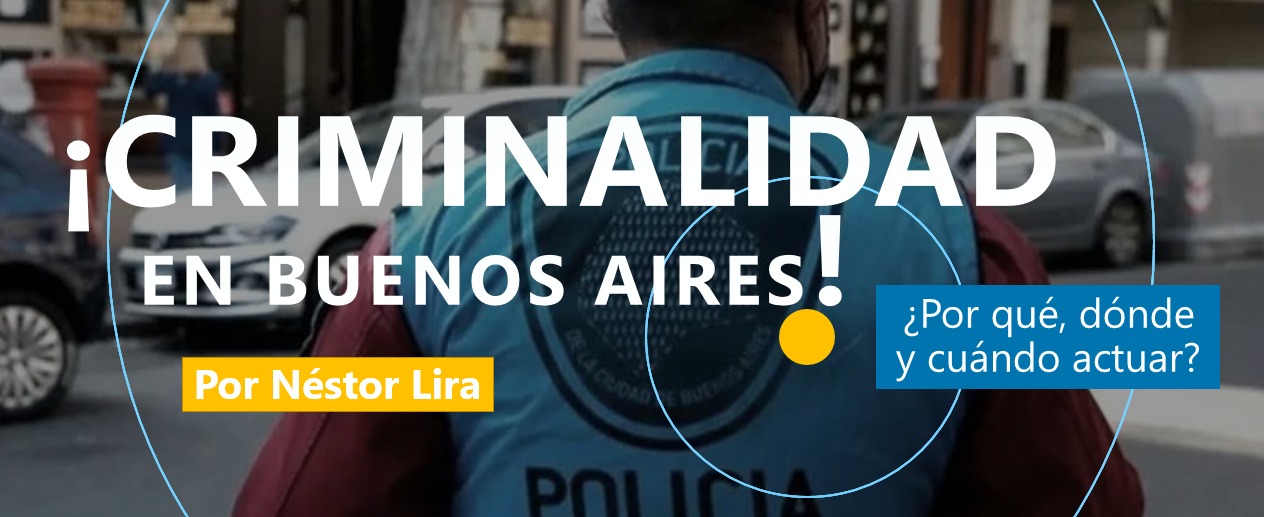

# Abstract
>El presente estudio tiene como objetivo analizar la influencia de diversas variables, como el lugar, la hora, el día de la semana y el mes, en la probabilidad de ser víctima de un delito en la ciudad de Buenos Aires. La motivación central de este análisis es contribuir a la toma de decisiones estratégicas para los responsables de la seguridad en la ciudad, con el objetivo de contrarrestar el aumento de la inseguridad localizada.

>Utilizando un conjunto de datos proporcionado por el gobierno de la ciudad, se pretende desarrollar un modelo predictivo utilizando Python, con el fin de comprender mejor los patrones y las tendencias asociadas a la criminalidad en esta área específica.

>El dataset abarca información detallada, incluyendo la fecha y la franja horaria de los incidentes, el día de la semana, el tipo de delito y el barrio correspondiente. Estos elementos permitirán realizar un análisis temporal y geoespacial integral para identificar posibles correlaciones y patrones emergentes.

>La variable temporal se explorará de varias maneras. Se investigará si la ocurrencia de ciertos tipos de delitos varía según el día de la semana, el mes o incluso la hora del día. La temporalidad puede revelar tendencias estacionales, comportamientos cíclicos o eventos particulares que podrían influir en la tasa de criminalidad.

>Asimismo, se analizará la ubicación geográfica de los delitos, evaluando si la incidencia varía según los distintos barrios de Buenos Aires. Esto podría proporcionar información valiosa sobre la distribución espacial de la criminalidad y permitir la identificación de áreas de mayor riesgo.

>Para la creación del modelo predictivo, se utilizarán bibliotecas de machine learning en Python, como scikit-learn. Se implementarán algoritmos de clasificación para predecir la probabilidad de que ocurra un delito en función de las variables mencionadas. El proceso de modelado incluirá la división del conjunto de datos en conjuntos de entrenamiento y prueba, la selección de características relevantes y la evaluación del rendimiento del modelo.

>Los resultados de este estudio podrían tener implicaciones significativas para el diseño de estrategias de seguridad y la asignación eficiente de recursos en la ciudad de Buenos Aires. La comprensión de los factores que influyen en la probabilidad de ser víctima de un delito permitirá desarrollar enfoques más efectivos para la prevención y la gestión de la seguridad pública en la región, proporcionando información valiosa a los tomadores de decisiones en materia de seguridad en la ciudad.

# Objetivo
>>El objetivo primordial de este estudio es proporcionar información precisa y confiable para respaldar la toma de decisiones en la gestión de recursos para las fuerzas de seguridad. A través de un enfoque adaptado de análisis exploratorio de datos, se busca resaltar aspectos directamente relevantes para la seguridad pública. Este enfoque implica identificar patrones y tendencias específicas en la ocurrencia de diversos tipos de delitos, permitiendo una comprensión profunda de las dinámicas delictivas en la región.






# Problema comercial
>>¿En qué barrios se cometen más delitos?

>>¿Qué tipos de delitos son los más comunes?

>>¿La hora influye en la cantidad de delitos?

>>¿En qué época del año se registra la mayor y menor cantidad de delitos? ¿Por qué?

>>¿El día de la semana influye en la cantidad de delitos?


# Contexto comercial
>En diversos contextos comerciales y gubernamentales, la implementación de modelos predictivos para completar el subtipo de crímenes denunciados ofrece una amplia gama de aplicaciones y beneficios significativos. Desde agencias gubernamentales de seguridad y departamentos de policía hasta empresas de seguridad privada y consultoras de seguridad, estos modelos facilitan la mejora en la asignación de recursos, la respuesta eficiente a emergencias y el cumplimiento de normativas. Además, en municipios y agencias de gestión de emergencias, optimizan los costos operativos y fortalecen la gestión de incidentes, mientras que en unidades de análisis criminal y centros de inteligencia policial, proporcionan herramientas para la identificación proactiva de riesgos y la prevención del crimen. También son fundamentales para instituciones académicas y consultorías en políticas públicas, ya que permiten la formulación basada en evidencia de políticas de seguridad y la evaluación de impacto de programas comunitarios, promoviendo así el bienestar y la seguridad ciudadana de manera integral.

# Contexto análitico
> Desde un archivo .csv obtenido de la página web del gobierno de la ciudad de Buenos Aires que contiene los datos correspondientes a los delitos denunciados en el año 2022 y cuyo delimitador es la "," se procedió a cargar, transformar y preparar los datos con los que posteriormente se realizaron los análisis y gráficos.

Esta es la descripción de las variables del dataset:

* id-mapa; número de identificación del incidente.
* anio; año en el que ocurrió.
* mes: mes en el que ocurrió.
* dia: día de la semana en el que ocurrió.
* fecha: en la que ocurrió.
* franja: hora aproximada en la que ocurrió.
* tipo: tipo de delito.
* subtipo: subclasificación del tipo de delito. Ej: Tipo = Robo, Subtipo : Robo celular.
* uso_arma: si hubo uso de arma.
* uso_moto: si hubo uso de moto.
* barrio: barrio en el que ocurrió.
* comuna: comuna en la que ocurrió.
* latitud: dato de la ubicación donde ocurrió.
* longitud: dato de la ubicación donde ocurrió.
* cantidad: cantidad de incidentes.

Fuente del dataset: https://data.buenosaires.gob.ar/dataset/delitos/resource/3fbc3808-14c7-4559-8ba5-f68e919fee40

# Preguntas de interes.


>1. Preguntas de interes.
>> 1. ¿Qué delito se comete más en la ciudad?
>> 2. ¿En qué barrio se cometen más delitos?
>> 3. ¿En qué mes se cometen más delitos?


# Instalación e importación de las librerías a utilizar

In [ ]:
# Instalación de librerías
!pip install scikit-optimize catboost
!pip install catboost


# Importar las librerías.
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import folium
import calendar
import os
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from folium.plugins import HeatMap
from ipywidgets import interact, widgets
from catboost import CatBoostClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer


# Armado del dataframe

In [ ]:
#Conecto a Google.
from google.colab import drive
drive.mount('/content/drive')

#Cargo los archivos.
ruta = '/content/drive/MyDrive/Coder Ds/Datasets/delitos_2022.csv'

# Creo el dataset
df = pd.read_csv(ruta)

# Elijo un estilo
plt.style.use('ggplot')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Wrangling

In [ ]:
# Consulto los datos nulos
df.isnull().sum()

id-mapa        0
anio           0
mes            0
dia            0
fecha          0
franja        47
tipo           0
subtipo        0
uso_arma       0
uso_moto       0
barrio      2391
comuna      2393
latitud     2385
longitud    2385
cantidad       0
dtype: int64

* Se eliminan las filas de los registros nulos de la columna franja por ser solo el 0.0003 % del total del df y estadísticamente no va a afectar.
* Se completan los valores nulos de la columna barrio con el valor "desconocido" por ser el 1.7 % del total de datos del df. Un número estadísticamente significativo.
Además, contienen datos de fecha y delito que van a ser importantes para el modelo cuando se analice por tiempo y por tipo de delito más adelante.
* Se eliminan las columnas con datos que no van a ser usados.
* Verificamos que no hay valores nulos.

In [ ]:
# Relleno los valores nulos en la columna 'barrio' con 'desconocido'
df['barrio'].fillna('INDETERMINADO', inplace=True)
df['comuna'].fillna('0', inplace=True)
df['longitud'].fillna('0', inplace=True)
df['latitud'].fillna('0', inplace=True)

# Elimino las filas enteras donde se registran valores nulos en la columna franja.
df = df.dropna(subset=['franja'])

df.isnull().sum()

id-mapa     0
anio        0
mes         0
dia         0
fecha       0
franja      0
tipo        0
subtipo     0
uso_arma    0
uso_moto    0
barrio      0
comuna      0
latitud     0
longitud    0
cantidad    0
dtype: int64

 Se verifica la existencia de valores duplicados de la columna id-mapa.

In [ ]:
# Verifico duplicados en la columna 'id-mapa'
duplicados = df['id-mapa'].duplicated()

# Cuento el número total de duplicados
numero_total_duplicados = duplicados.sum()

# Imprimo el los resultados

print("\nNúmero total de duplicados en la columna 'id-mapa':", numero_total_duplicados)


Número total de duplicados en la columna 'id-mapa': 0


Se imprime la información general del dataframe a utilizar para conocer su estructura y tipos de datos.

In [ ]:
# Veo la información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140871 entries, 0 to 140917
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id-mapa   140871 non-null  int64  
 1   anio      140871 non-null  int64  
 2   mes       140871 non-null  object 
 3   dia       140871 non-null  object 
 4   fecha     140871 non-null  object 
 5   franja    140871 non-null  float64
 6   tipo      140871 non-null  object 
 7   subtipo   140871 non-null  object 
 8   uso_arma  140871 non-null  object 
 9   uso_moto  140871 non-null  object 
 10  barrio    140871 non-null  object 
 11  comuna    140871 non-null  object 
 12  latitud   140871 non-null  object 
 13  longitud  140871 non-null  object 
 14  cantidad  140871 non-null  int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 17.2+ MB


Se puede ver que hay muchas columnas de tipo objeto y las vamos a cambiar a tipo categórico.
* Se convierte a formato fecha la columna fecha y se ordena el df en ordén cronológico.
* Se cambian los tipos de datos de las columnas mes, día, tipo, subtipo,  uso_arma, uso_moto y barrio de objeto a categoría.
*Se imprime la información general de df para verificar los cambios hechos.
* Se corrobora el cambio en las columnas nombradas arriba.

In [ ]:
# Convierto la columna 'Date' a datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Ordeno por la variable tiempo
df = df.sort_values(by='fecha')

# Crear una nueva columna 'mes' extrayendo el mes de la columna de fecha
df['mes1'] = df['fecha'].dt.month

# Cambio el tipo de dato de las columnas de tipo objeto a categóricas y la columna franja de tipo float a categórica
columnas_a_cambiar = ['mes', 'dia', 'tipo', 'subtipo', 'uso_arma', 'uso_moto', 'barrio', 'franja']
df[columnas_a_cambiar] = df[columnas_a_cambiar].astype('category')

# Cambio el tipo de dato de las columnas de tipo objeto a float
columnas_a_cambiar2 = ['comuna', 'latitud', 'longitud']
df[columnas_a_cambiar2] = df[columnas_a_cambiar2].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140871 entries, 11274 to 140917
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id-mapa   140871 non-null  int64         
 1   anio      140871 non-null  int64         
 2   mes       140871 non-null  category      
 3   dia       140871 non-null  category      
 4   fecha     140871 non-null  datetime64[ns]
 5   franja    140871 non-null  category      
 6   tipo      140871 non-null  category      
 7   subtipo   140871 non-null  category      
 8   uso_arma  140871 non-null  category      
 9   uso_moto  140871 non-null  category      
 10  barrio    140871 non-null  category      
 11  comuna    140871 non-null  float64       
 12  latitud   140871 non-null  float64       
 13  longitud  140871 non-null  float64       
 14  cantidad  140871 non-null  int64         
 15  mes1      140871 non-null  int32         
dtypes: category(8), datetime64[ns](1), floa

Se revisa la forma del dataframe


In [ ]:
# Obtener el shape del DataFrame
shape = df.shape

print("Número de filas:", shape[0])
print("Número de columnas:", shape[1])

Número de filas: 140871
Número de columnas: 16


# Análisis exploratorio de datos (EDA)


Se chequean los valores del df.

In [ ]:
# Imprimo el df.
print(df)

        id-mapa  anio        mes     dia      fecha franja      tipo  \
11274     11275  2022      ENERO  SABADO 2022-01-01    5.0      Robo   
132475   975058  2022      ENERO  SABADO 2022-01-01   11.0  Amenazas   
132474   975057  2022      ENERO  SABADO 2022-01-01   11.0  Lesiones   
134109   984613  2022      ENERO  SABADO 2022-01-01   12.0  Amenazas   
127006   945359  2022      ENERO  SABADO 2022-01-01   11.0  Amenazas   
...         ...   ...        ...     ...        ...    ...       ...   
9281       9282  2022  DICIEMBRE  SABADO 2022-12-31    3.0      Robo   
9280       9281  2022  DICIEMBRE  SABADO 2022-12-31   22.0     Hurto   
128284   952218  2022  DICIEMBRE  SABADO 2022-12-31    3.0  Lesiones   
9868       9869  2022  DICIEMBRE  SABADO 2022-12-31    1.0      Robo   
140917  1114498  2022  DICIEMBRE  SABADO 2022-12-31   21.0  Vialidad   

                              subtipo uso_arma uso_moto            barrio  \
11274                      Robo total       NO       NO   

Se imprimen los valores generales del df.

In [ ]:
# Veo los datos generales
df.describe().round(2)

id-mapa      anio                          fecha     comuna  \
count   140871.00  140871.0                         140871  140871.00   
mean    244237.82    2022.0  2022-07-10 01:36:45.754200832       7.25   
min          1.00    2022.0            2022-01-01 00:00:00       0.00   
25%      35218.50    2022.0            2022-04-09 00:00:00       3.00   
50%      70436.00    2022.0            2022-07-14 00:00:00       7.00   
75%     105653.50    2022.0            2022-10-11 00:00:00      11.00   
max    1114498.00    2022.0            2022-12-31 00:00:00      15.00   
std     363334.01       0.0                            NaN       4.65   

         latitud    longitud  cantidad       mes1  
count  140871.00   140871.00  140871.0  140871.00  
mean      -34.04      -16.00       1.0       6.79  
min       -34.70      -65.42       1.0       1.00  
25%       -34.63      -58.47       1.0       4.00  
50%       -34.61      -58.43       1.0       7.00  
75%       -34.59      -58.40       1.0      10.00  
max         0.00  5840982.00       1.0      12.00  
std         4.42    15562.50       0.0       3.44

## Análisis por tipos de delitos.

### ¿Qué delito se comete más en la ciudad?

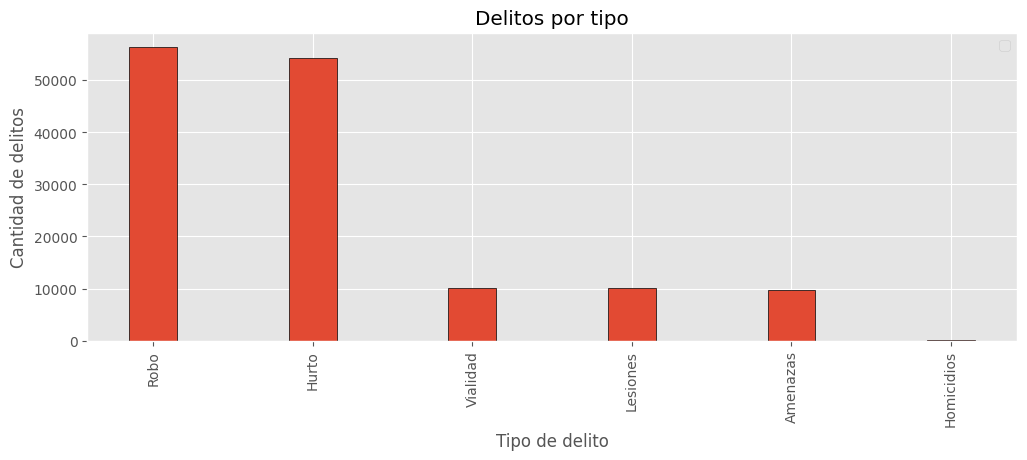

In [ ]:
# Filtro por barrio y cuento la frecuencia
frec_tipo = df.groupby(["tipo"]).size()

# Convierto la serie en dataframe
df_frec_tipo = frec_tipo.to_frame('delitos')

# Ordeno el DataFrame de frecuencias por el número de delitos en orden descendente
df_frec_tipo = df_frec_tipo.sort_values(by='delitos', ascending=False)

# Elijo mis variables x e y
nombre_x = 'Tipo de delito'
nombre_y = 'Cantidad de delitos'
y = df_frec_tipo["delitos"]
x = df_frec_tipo.index

# Crea una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 4))

# Creo el gráfico
ax.bar(x, y, width = 0.3, edgecolor = 'black',)

# Etiqueto los ejes
ax.set_xlabel(f'{nombre_x}')
ax.set_ylabel(f'{nombre_y}')

# Agrego un título
ax.set_title('Delitos por tipo')

# Giro las etiquetas del eje x las hago más pequeñas
ax.tick_params(axis='x', rotation=90)

# Añado la leyenda al gráfico
plt.legend()

# Muestro el gráfico
plt.show()

Se filtraron los datos para poder representar los delitos por tipo ocurridos en la ciudad y es evidente la diferencia entre el robo y el hurto con los otros tipos de delitos registrados en la base de datos. Esto muestra los principales problemas que afectan la ciudad en cuanto a crimen se refiere y que deberían ser evaluados prioritariamente para su resolución.

### ¿Qué subtipo de delito se comete más en la ciudad?

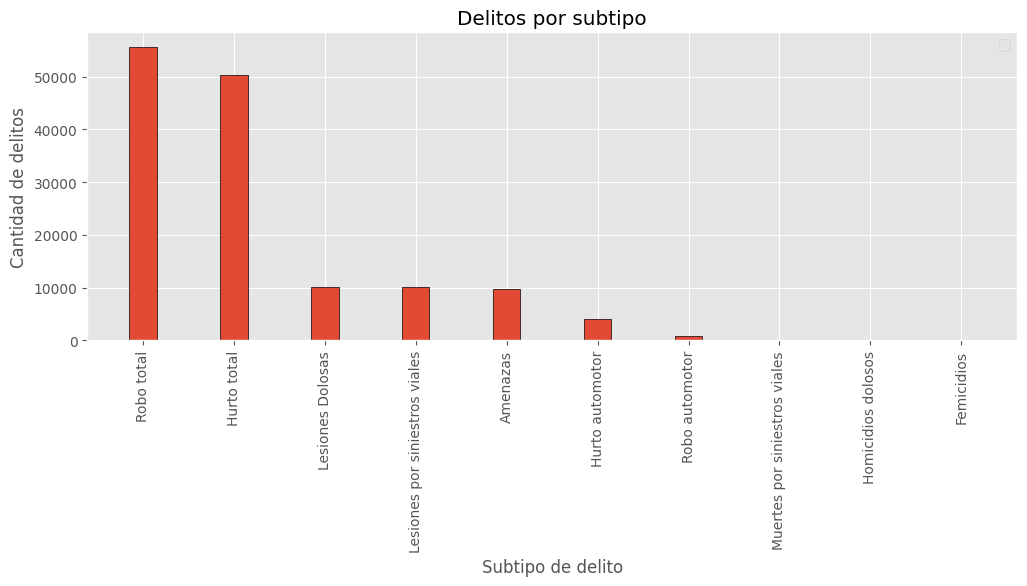

In [ ]:
# Filtro por barrio y cuento la frecuencia
frec_subtipo = df.groupby(["subtipo"]).size()

# Convierto la serie en dataframe
df_frec_subtipo = frec_subtipo.to_frame('delitos')

# Ordeno el DataFrame de frecuencias por el número de delitos en orden descendente
df_frec_subtipo = df_frec_subtipo.sort_values(by='delitos', ascending=False)

# Elijo mis variables x e y
nombre_x = 'Subtipo de delito'
nombre_y = 'Cantidad de delitos'
y = df_frec_subtipo["delitos"]
x = df_frec_subtipo.index

# Crea una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 4))

# Creo el gráfico
ax.bar(x, y, width = 0.3, edgecolor = 'black',)

# Etiqueto los ejes
ax.set_xlabel(f'{nombre_x}')
ax.set_ylabel(f'{nombre_y}')

# Agrego un título
ax.set_title('Delitos por subtipo')

# Giro las etiquetas del eje x y hazlas más pequeñas
ax.tick_params(axis='x', rotation=90)

# Añado la leyenda al gráfico
plt.legend()

# Muestro el gráfico
plt.show()

NOTA: La suma de robo total con robo automotor y hurto total con hurto automotor da como resultado el total de hurtos y robos del gráfico anterior.

De igual manera que en el gráfico de delitos por tipo, se destaca el robo total y el hurto total como principal tipo de incidente ocurrido en la ciudad por mucho.

## Análisis geográfico.

### ¿En qué barrio se cometen más delitos?

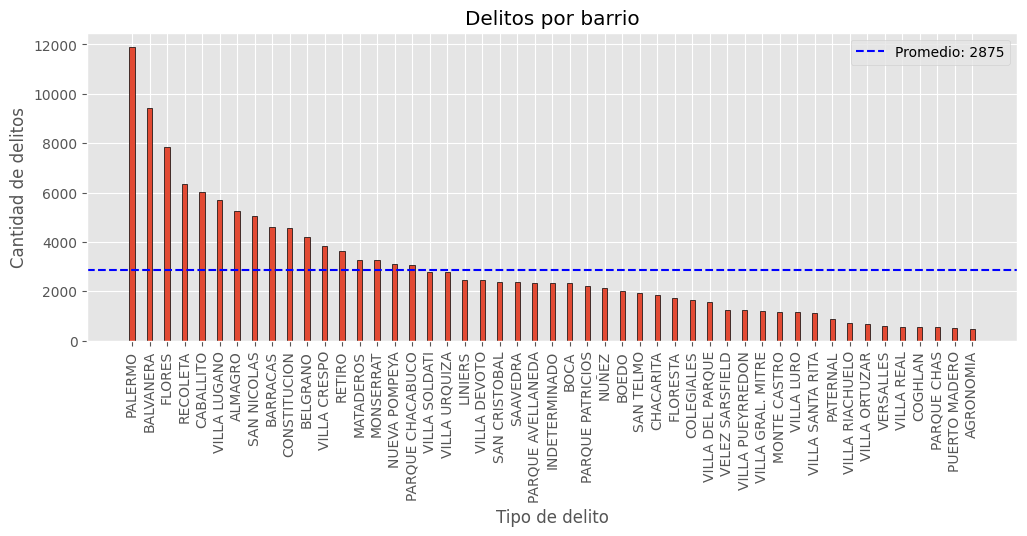

In [ ]:
# Filtro por barrio y cuento la frecuencia
frec_barrio = df.groupby(["barrio"]).size()

# Convierto la serie en dataframe
df_frec_barrio = frec_barrio.to_frame('delitos')

# Ordeno el DataFrame de frecuencias por el número de delitos en orden descendente
df_frec_barrio = df_frec_barrio.sort_values(by='delitos', ascending=False)

#Elijo mis variables x e y
nombre_x = 'Tipo de delito'
nombre_y = 'Cantidad de delitos'
y = df_frec_barrio["delitos"]
x = df_frec_barrio.index

# Creo una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 4))

# Creo el gráfico
ax.bar(x, y, width = 0.3, edgecolor = 'black',)

# Etiqueto los ejes
ax.set_xlabel(f'{nombre_x}')
ax.set_ylabel(f'{nombre_y}')

# Agrego un título
ax.set_title('Delitos por barrio')

# Giro las etiquetas del eje x y hazlas más pequeñas
ax.tick_params(axis='x', rotation=90)

# Calculo el promedio por barrio de delitos de toda la ciudad
promedio = df_frec_barrio["delitos"].mean()

# Agrego una línea roja para marcar el valor promedio con una etiqueta
plt.axhline(promedio, color="blue", linestyle="--", label=f'Promedio: {promedio:.0f}')

# Añado la leyenda al gráfico
plt.legend()

# Muestro el gráfico
plt.show()

Se calculó el promedio de delitos en la ciudad y se comparó con el total de delitos cometidos en cada barrio de la ciudad. En la distribución de los incidentes se evidencian que hay zonas que han tenido más del triple de sucesos que el promedio. Esto podría deberse al movimiento de la población en la ciudad, ya que en el top 3 de barrios se encuentran importantes zonas comerciales como son la venta mayorista de mercadería en los barrios de Balvanera y Flores y la gran oferta de vida nocturna concentrada en el barrio de Palermo.

### Mapa que muestra los datos geoespaciales.
####Es posible filtrarlo por tipo de delito.

In [ ]:
# Asignar los datos
data = df  # Datos de coordenadas y tipos de delitos aleatorios
df_heat = pd.DataFrame(data, columns=['latitud', 'longitud', 'tipo'])  # Convertir los datos a un DataFrame de pandas

# Elimino las filas enteras donde se registran valores nulos en la columna franja.
df_heat = df_heat.dropna(subset=['latitud'])

# Coordenadas de Buenos Aires
lat_buenos_aires = -34.6037
long_buenos_aires = -58.3816

# Función para generar y mostrar el mapa de calor según el tipo de delito seleccionado
def mostrar_heatmap(tipo_delito):
    # Filtrar datos según el tipo de delito seleccionado
    if tipo_delito == 'Todos':
        df_filtrado = df_heat
    else:
        df_filtrado = df_heat[df_heat['tipo'] == tipo_delito]

    # Crear un mapa centrado en una ubicación específica
    mapa = folium.Map(location=[lat_buenos_aires, long_buenos_aires], zoom_start=10)

    # Convertir los datos de coordenadas filtrados a una lista de listas [[lat, lon], [lat, lon], ...]
    heat_data = df_filtrado[['latitud', 'longitud']].values.tolist()

    # Añadir el mapa de calor al mapa
    HeatMap(heat_data).add_to(mapa)

    # Mostrar el mapa de calor
    display(mapa)

# Obtener la lista única de tipos de delitos y agregar 'Todos' como opción
tipos_de_delitos = ['Todos'] + df_heat['tipo'].unique().tolist()

# Crear un menú desplegable interactivo para seleccionar el tipo de delito
interact(mostrar_heatmap, tipo_delito=widgets.Dropdown(options=tipos_de_delitos, description='Tipo de Delito:'));


interactive(children=(Dropdown(description='Tipo de Delito:', options=('Todos', 'Robo', 'Amenazas', 'Lesiones'…

Esta es una herramienta visual que permite filtrar por tipo de delito y muestra donde se cometió el hecho.

## Análisis temporal

### ¿En qué mes se cometen más delitos?

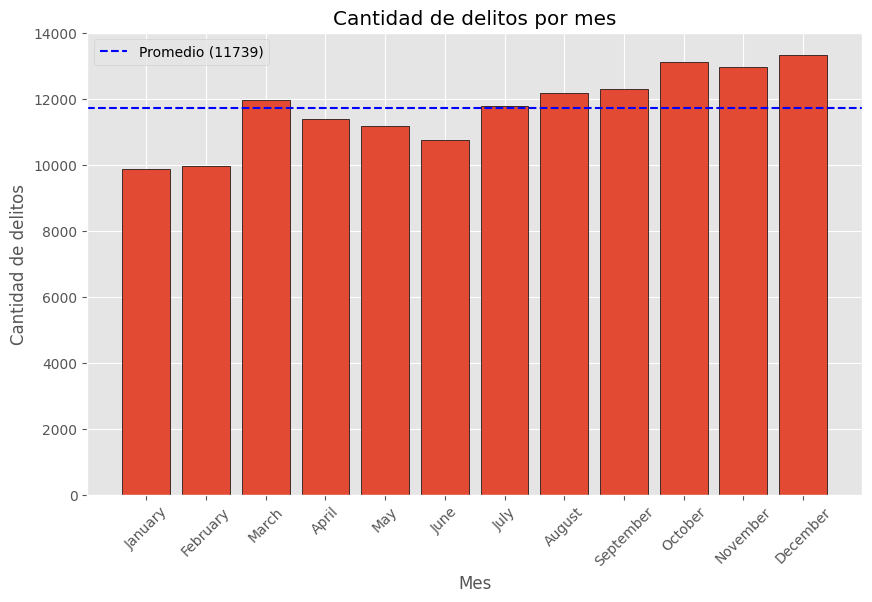

In [ ]:
# Convertir la columna 'fecha' a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Crear nueva columna 'Mes'
df['Mes'] = df['fecha'].dt.month

# Calcular la frecuencia total de delitos por mes
delitos_por_mes = df.groupby('Mes').size().reset_index(name='Frecuencia')

# Calcular el promedio de delitos por mes
promedio_delitos_por_mes = delitos_por_mes['Frecuencia'].mean()

# Crear el gráfico de barras para la frecuencia total de delitos por mes
plt.figure(figsize=(10, 6))
plt.bar(delitos_por_mes['Mes'], delitos_por_mes['Frecuencia'], edgecolor='black')

# Agregar línea para el promedio de delitos por mes
plt.axhline(y=promedio_delitos_por_mes, color='blue', linestyle='--', label=f'Promedio ({promedio_delitos_por_mes:.0f})')

# Configurar etiquetas y leyenda
plt.title('Cantidad de delitos por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de delitos')
plt.xticks(range(1, 13), [calendar.month_name[i].capitalize() for i in range(1, 13)], rotation=45)
plt.legend()

# Mostrar el gráfico
plt.show()


NOTA: No he podido encontrar la manera de poner los nombres en español con una función. No quise ponerlos con una lista uno a uno. De ser necesario lo haré así.

 En este gráfico se agruparon los delitos reportados sin importar su tipo para tener una vista general del comportamiento en volumen de la criminalidad durante el año. En el msimo orden se calculó el promedio de delitos por mes y se dispusieron las barras de manera que sea fácil la comparación.

 Aquí se encontró que en los meses de enero, febrero y junio se reducen la cantidad de incidentes ocurridos. Las vacaciones pueden ser un motivo por el cuál se da este comportamiento, ya que la población tiende a salir de la ciudad.

En el último trimestre del año se nota el aumento en la cantidad de delitos. Una de las razones puede ser el crecimiento temporal en las actividades comerciales generadas por la época navideña.

### ¿A qué hora del día se comete más cada tipo de delito?

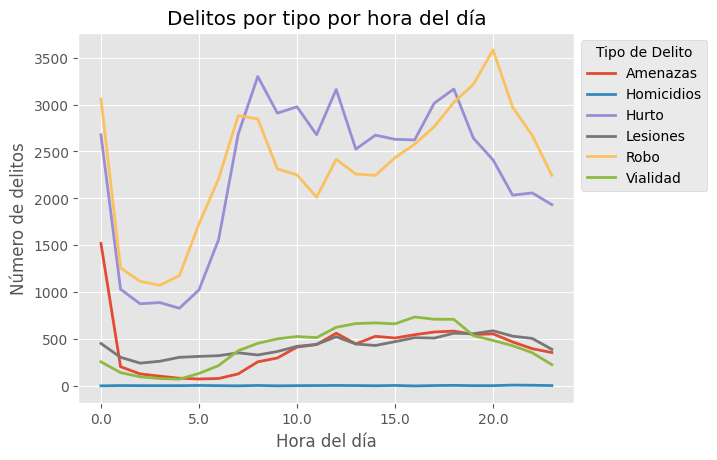

In [ ]:
# Cuento el número de delitos por tipo y dia
delitos_por_tipo_barrio_franja = df.groupby(["franja", "tipo"]).size().sort_values(ascending=False)

# Creo el gráfico de barras
fig, ax = plt.subplots()
delitos_por_tipo_barrio_franja.unstack().plot.line(ax=ax, linewidth=2)

# Agrego títulos y etiquetas
ax.set_title("Delitos por tipo por hora del día")
ax.set_xlabel("Hora del día")
ax.set_ylabel("Número de delitos")
plt.legend(title='Tipo de Delito', bbox_to_anchor=(1, 1))

# Muestra el gráfico
plt.show()

* Podemos ver que de 1 a 4 hs se evidencia un marcado descenso en el número de incidentes en todos los tipos estudiados. Esto se debe a que son las de 20 de la mayoría de las personas bajando la probabilidad de ocurrencia por la disminución del movimiento de las personas.

* Entre las 8 y las 20 hs se nota un incremento muy marcado en todos los tipos de delitos debido a que son las horas de mayor circulación de la población que desarrolla sus actividades cotidianas.
No obstante, los robos y hurtos empiezan a aumentar desde las 4 hs, hora en la que muchos salen a tomar el transporte para poder llegar a sus lugares de trabajo o estudio.

# División de los datos en grupo de entrenamiento y grupo de prueba

Los datos serán divididos en dos grupos: uno en la proporción de 70 % de los datos para el entrenamiento y 30 % para la prueba, y el otro en la proporción de 80 % para el entrenamiento y 20 % para la prueba. Esto tiene como objetivo evaluar cómo afecta el rendimiento de los modelos la utilización de distintos grupos de prueba/entrenamiento.

Se divide el dataframe en variables predictoras (X) y variable objetivo (y)



In [ ]:
# Se asignan cuáles van a ser los datos que usarán los modelos para predecir y cuál columna se va a predecir,
X = df[['dia', 'franja', 'uso_arma', 'uso_moto', 'barrio', 'mes1', 'tipo']]
y = df['subtipo']

Se dividen los datos en 70 % de los datos de entrenamietno y 30 % de los datos de prueba.

In [ ]:
# Preprocesamiento de datos
X_g1 = X
y_g1 = y

# Codificación one-hot para las variables categóricas
X_encoded_g1 = pd.get_dummies(X_g1, columns=['dia', 'franja', 'uso_arma', 'uso_moto', 'barrio', 'mes1', 'tipo'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_g1, X_test_g1, y_train_g1, y_test_g1 = train_test_split(X_encoded_g1, y_g1, test_size=0.3, random_state=42, stratify=y_g1)

# Escalar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled_g1 = pd.DataFrame(scaler.fit_transform(X_train_g1), columns=X_train_g1.columns)
X_test_scaled_g1 = pd.DataFrame(scaler.transform(X_test_g1), columns=X_test_g1.columns)

Se dividen los datos en 80 % de los datos de entrenamietno y 20 % de los datos de prueba.

In [ ]:
# Preprocesamiento de datos
X_g2 = X
y_g2 = y

# Codificación one-hot para las variables categóricas
X_encoded_g2 = pd.get_dummies(X_g2, columns=['dia', 'franja', 'uso_arma', 'uso_moto', 'barrio', 'mes1', 'tipo'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_g2, X_test_g2, y_train_g2, y_test_g2 = train_test_split(X_encoded_g2, y_g2, test_size=0.2, random_state=42, stratify=y_g2)

# Escalar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled_g2 = pd.DataFrame(scaler.fit_transform(X_train_g2), columns=X_train_g2.columns)
X_test_scaled_g2 = pd.DataFrame(scaler.transform(X_test_g2), columns=X_test_g2.columns)

# Instanciado de modelos

Inicialización de la configuración de los modelos que serán utilizados. Los modelos son Regresión Multinomial, Random Forest, Support Vector Machine (SVM) y CatBoost. Se eligieron estos modelos porque su uso principal es la clasificación.

In [ ]:
# Instanciado del modelo CatBoost
catboost= CatBoostClassifier(verbose=0)

# Instanciado del modelo CatBoost
Reg_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=42)

# Instanciado del modelo Ramdon Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Instanciado del modelo SVM
svm_classifier = SVC(kernel='linear', random_state=42)

#Definición de funciones

Esta función guarda las métricas resultantes del desempeño de los modelos en un archivo .csv.

In [ ]:
# Definir path para guardar los archivos CSV
path = '/content/drive/MyDrive/Coder Ds/Proyecto Final'

def save_metrics_to_csv(model_name, accuracy, precision, accuracy_train, f1_score_value, recall_score_value, filename):
    # Construir la path completa del archivo CSV
    file_path = os.path.join(path, filename)

    # Verificar si el archivo existe
    file_exists = os.path.isfile(file_path)

    # Definir el diccionario de métricas
    model_metrics = {
        'Model': model_name if model_name else 'Unknown',
        'Accuracy': accuracy,
        'Precision': precision,
        'Accuracy train': accuracy_train,
        'F1_score': f1_score_value,
        'Recall': recall_score_value
    }

    with open(file_path, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=model_metrics.keys())

        if not file_exists:
            writer.writeheader()

        writer.writerow(model_metrics)

    print(f'Métricas guardadas en {file_path}')

Esta función evalúa un modelo, imprime los resultados del desempeño, el reporte de clasificación, calcula e imprime la matriz de confusión y guarda las mátricas.

In [ ]:
def evaluate_and_save_metrics(model, X_train, y_train, X_test, y_test, model_name=None, filename='model_metrics.csv'):
    # Entrenar el modelo si no está entrenado previamente
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    predictions_test = model.predict(X_test)

    # Evaluar el rendimiento del modelo
    accuracy = accuracy_score(y_test, predictions_test)
    precision = precision_score(y_test, predictions_test, average='weighted', zero_division=0)
    f1_score_value = f1_score(y_test, predictions_test, average='weighted', zero_division=0)
    recall_score_value = recall_score(y_test, predictions_test, average='weighted', zero_division=0)

    # Calcular las predicciones escaladas al conjunto de datos de entrenamiento
    predictions_train = model.predict(X_train)

    # Calcular la exactitud del modelo en fase de entrenamiento
    accuracy_train = accuracy_score(y_train, predictions_train)

    # Imprimir métricas
    print(model_name)
    print(f'Accuracy: {accuracy:.8f}')
    print(f'Precision: {precision:.8f}')
    print(f'F1-Score: {f1_score_value:.8f}')
    print(f'Recall: {recall_score_value:.8f}')
    print(f'Accuracy en conjunto de entrenamiento: {accuracy_train:.8f}')

    # Imprimir informe de clasificación
    print(classification_report(y_test, predictions_test, zero_division=0))

    # Imprimir matriz de confusión
    conf_matrix = confusion_matrix(y_test, predictions_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Matriz de confusión de {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Llamar a la función para guardar las métricas en el archivo CSV
    save_metrics_to_csv(model_name, accuracy, precision, accuracy_train, f1_score_value, recall_score_value, filename)

Esta función carga el archivo donde se almacenaron las métricas y las imprime.

In [ ]:
# Definir la path donde se buscará el archivo y se guardarán los resultados
path = '/content/drive/MyDrive/Coder Ds/Proyecto Final/'

# Función para cargar y mostrar el contenido del archivo CSV
def load_and_display_metrics(filename):
    # Construir la path completa del archivo CSV
    file_path = os.path.join(path, filename)

    # Verificar si el archivo existe antes de intentar abrirlo
    if os.path.isfile(file_path):
        # Abrir el archivo y leer su contenido
        with open(file_path, mode='r') as file:
            reader = csv.DictReader(file)

            # Leer las filas en una lista
            rows = list(reader)

            # Imprimir los datos en formato de tabla
            if rows:
                print(tabulate(rows, headers="keys", tablefmt="grid"))
            else:
                print("El archivo está vacío.")
    else:
        print(f'El archivo {filename} no existe en la ruta {path}.')

Esta función toma los datos de entrenamiento y prueba usados en el modelo para imprimir la curva de aprendizaje del modelo.

In [ ]:
def plot_learning_curve(model, X_train, y_train, title_name=None, cv=0, random_state=42):
    # Calcular las curvas de aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=cv, random_state=random_state)

    # Calcular las medias de los puntajes de entrenamiento y prueba
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    # Graficar las curvas de aprendizaje
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Score')
    plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title(f'Learning curve de {title_name}')
    plt.legend()
    plt.grid()
    plt.show()

Esta función imprime la matriz de confusión con los resultados predichos del modelo.

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Matriz de confusión de {model_name}')
    plt.show()

Esta función imprime el conteo de cada variable, aplica el sobremuestreo con el método SMOTE, imprime el conteo y evalúa el rendimiento de los modelos después del tratamiento de los datos, imprime la matriz de confusión y guarda las métricas en un archivo .csv.

In [ ]:
# Definir la path donde se buscará el archivo y se guardarán los resultados
path = '/content/drive/MyDrive/Coder Ds/Proyecto Final/'

def apply_smote_and_evaluate(model, X_train, y_train, X_test, y_test, model_name=None, filename='model_metrics.csv'):
    # Antes de aplicar SMOTE
    print(model_name)
    print("Antes del balanceo:")
    print(pd.Series(y_train).value_counts())

    # Preprocesamiento de los datos
    X_train_smote = X_train.replace({True: 1, False: 0})

    # Identificar la clase minoritaria y contar muestras
    unique, counts = np.unique(y_train, return_counts=True)
    min_class_count = min(counts)
    min_class = unique[np.argmin(counts)]

    # Ajustar SMOTE
    k_neighbors = max(1, min_class_count - 1)  # k_neighbors debe ser al menos 1 y menos que el número de muestras en la clase minoritaria

    # Aplicar SMOTE para balancear las clases
    smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_smote, y_train)

    # Después de aplicar SMOTE
    print("Después del balanceo:")
    print(pd.Series(y_train_resampled).value_counts())

    # Entrenar un modelo con los datos balanceados
    model.fit(X_train_resampled, y_train_resampled)

    # Codificación one-hot para las variables categóricas del conjunto de prueba
    X_test_encoded = pd.get_dummies(X_test)
    X_test_encoded = X_test_encoded.reindex(columns=X_train_resampled.columns, fill_value=0)

    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_encoded)

    # Calcular las métricas del modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    f1_score_value = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    recall_score_value = recall_score(y_test, y_pred, average='weighted', zero_division=0)

    # Calcular la exactitud del modelo en fase de entrenamiento
    y_train_pred = model.predict(X_train_resampled)
    accuracy_train = accuracy_score(y_train_resampled, y_train_pred)

    print(f'Accuracy: {accuracy:.8f}')
    print(f'Precision: {precision:.8f}')
    print(f'F1-Score: {f1_score_value:.8f}')
    print(f'Recall: {recall_score_value:.8f}')
    print(f'Accuracy en conjunto de entrenamiento: {accuracy_train:.8f}')
    print(classification_report(y_test, y_pred, zero_division=0))

    # Graficar e imprimir la matriz de confusión
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Guardar las métricas en un archivo CSV
    save_metrics_to_csv(model_name, accuracy, precision, accuracy_train, f1_score_value, recall_score_value, filename)

Esta función aplica el redimensionado de los datos usando el método PCA, extrae las cargas para identificar las variables más importantes del DataFrame, las imprime en barras horizontales, evalúa el modelo con esos datos, imprime la matriz de confusión y guarda las métricas de desempeño en un archivo .csv.

In [ ]:
def pca_evaluation_and_save_metrics(df, target_column, model, model_name=None, filename='model_metrics.csv', n_components=2):
    if target_column not in df.columns:
        raise ValueError(f"La columna objetivo '{target_column}' no existe en el DataFrame.")

    # Verificar si las columnas necesarias existen en el DataFrame
    feature_columns = ['dia', 'franja', 'uso_arma', 'uso_moto', 'barrio', 'mes1', 'tipo']
    for col in feature_columns:
        if col not in df.columns:
            raise ValueError(f"La columna '{col}' no existe en el DataFrame.")

    # Supongamos que este es tu DataFrame
    df_pca = df[feature_columns]

    # Convertir y_pca a una matriz unidimensional
    y_pca = df[target_column].values
    y_pca = y_pca.ravel()

    # Codificar las variables categóricas utilizando One-Hot Encoding
    df_pca_encoded = pd.get_dummies(df_pca)

    # Estandarizar los datos
    scaler = StandardScaler()
    df_pca_scaled = scaler.fit_transform(df_pca_encoded)

    # Aplicar PCA
    pca = PCA(n_components=n_components)
    pca.fit(df_pca_scaled)
    df_pca = pca.transform(df_pca_scaled)

    # Extraer las cargas
    components = pd.DataFrame(pca.components_, columns=df_pca_encoded.columns, index=[f'PC{i}' for i in range(1, len(pca.components_)+1)])
    print("Cargas de las componentes principales:")
    print(components)

    # Graficar las 10 variables más importantes para cada componente principal
    plot_top_10_features(components, n_components)

    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(df_pca, y_pca, test_size=0.3, random_state=42)

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    f1_score_value = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    recall_score_value = recall_score(y_test, y_pred, average='weighted', zero_division=0)

    # Calcular las predicciones en el conjunto de entrenamiento
    y_train_pred = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)

    print(model_name)
    print(f'Accuracy: {accuracy:.8f}')
    print(f'Precision: {precision:.8f}')
    print(f'F1-Score: {f1_score_value:.8f}')
    print(f'Recall: {recall_score_value:.8f}')
    print(f'Accuracy en conjunto de entrenamiento: {accuracy_train:.8f}')
    print(classification_report(y_test, y_pred, zero_division=0))

    # Graficar e imprimir la matriz de confusión
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Guardar las métricas en un archivo CSV utilizando la función save_metrics_to_csv
    save_metrics_to_csv(model_name, accuracy, precision, accuracy_train, f1_score_value, recall_score_value, filename)


Esta función hace la misma tarea que la anterior pero optimizada para que sea usada con el modelo CatBoost.

In [ ]:
def pca_evaluation_and_save_metrics_catboost(df, target_column, model, model_name=None, filename='model_metrics.csv', n_components=2):
    if target_column not in df.columns:
        raise ValueError(f"La columna objetivo '{target_column}' no existe en el DataFrame.")

    # Verificar si las columnas necesarias existen en el DataFrame
    feature_columns = ['dia', 'franja', 'uso_arma', 'uso_moto', 'barrio', 'mes1', 'tipo']
    for col in feature_columns:
        if col not in df.columns:
            raise ValueError(f"La columna '{col}' no existe en el DataFrame.")

    # Supongamos que este es tu DataFrame
    df_pca = df[feature_columns]

    # Convertir y_pca a una matriz unidimensional
    y_pca = df[target_column].astype('category').cat.codes.values  # Convert to integer codes
    y_pca = y_pca.ravel()

    # Codificar las variables categóricas utilizando One-Hot Encoding
    df_pca_encoded = pd.get_dummies(df_pca)

    # Estandarizar los datos
    scaler = StandardScaler()
    df_pca_scaled = scaler.fit_transform(df_pca_encoded)

    # Aplicar PCA
    pca = PCA(n_components=n_components)
    pca.fit(df_pca_scaled)
    df_pca = pca.transform(df_pca_scaled)

    # Extraer las cargas
    components = pd.DataFrame(pca.components_, columns=df_pca_encoded.columns, index=[f'PC{i}' for i in range(1, len(pca.components_)+1)])
    print("Cargas de las componentes principales:")
    print(components)

    # Graficar las 10 variables más importantes para cada componente principal
    plot_top_10_features(components, n_components)

    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(df_pca, y_pca, test_size=0.3, random_state=42)

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    f1_score_value = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    recall_score_value = recall_score(y_test, y_pred, average='weighted', zero_division=0)

    # Calcular las predicciones en el conjunto de entrenamiento
    y_train_pred = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)

    print(f'Accuracy: {accuracy:.8f}')
    print(f'Precision: {precision:.8f}')
    print(f'F1-Score: {f1_score_value:.8f}')
    print(f'Recall: {recall_score_value:.8f}')
    print(f'Accuracy en conjunto de entrenamiento: {accuracy_train:.8f}')
    print(classification_report(y_test, y_pred, zero_division=0))

    # Graficar e imprimir la matriz de confusión
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Guardar las métricas en un archivo CSV utilizando la función save_metrics_to_csv
    save_metrics_to_csv(model_name, accuracy, precision, accuracy_train, f1_score_value, recall_score_value, filename)


Esta función imprime las 10 variables más importantes des pués de hace un PCA

In [ ]:
def plot_top_10_features(components, n_components=2):
    for i in range(n_components):
        component = components.iloc[i]
        top_10_features = component.nlargest(10)
        plt.figure(figsize=(10, 6))
        plt.barh(top_10_features.index, top_10_features.values)
        plt.xlabel('Peso del componente')
        plt.title(f'Top 10 variables del Componente Principal {i + 1}')
        plt.gca().invert_yaxis()  # Invertir el eje y para que la barra más alta esté en la parte superior
        plt.show()

# Modelo de regresión multinomial



El modelo de regresión multinomial se utiliza cuando la variable dependiente (o respuesta) es categórica con más de dos categorías distintas. En otras palabras, el modelo de regresión multinomial se emplea cuando tenemos un conjunto de variables independientes que queremos usar para predecir la probabilidad de que una observación pertenezca a una de varias categorías mutuamente excluyentes.

Regresión Multinomial 70/30
Accuracy: 0.96507501
Precision: 0.93422716
F1-Score: 0.94825983
Recall: 0.96507501
Accuracy en conjunto de entrenamiento: 0.96517559
                                precision    recall  f1-score   support

                      Amenazas       1.00      1.00      1.00      2943
                    Femicidios       0.00      0.00      0.00         1
            Homicidios dolosos       0.96      1.00      0.98        25
               Hurto automotor       0.00      0.00      0.00      1215
                   Hurto total       0.93      1.00      0.96     15077
              Lesiones Dolosas       1.00      1.00      1.00      3046
Lesiones por siniestros viales       0.99      1.00      0.99      3021
 Muertes por siniestros viales       0.00      0.00      0.00        33
                Robo automotor       0.33      0.00      0.01       226
                    Robo total       0.99      1.00      0.99     16675

                      accuracy               

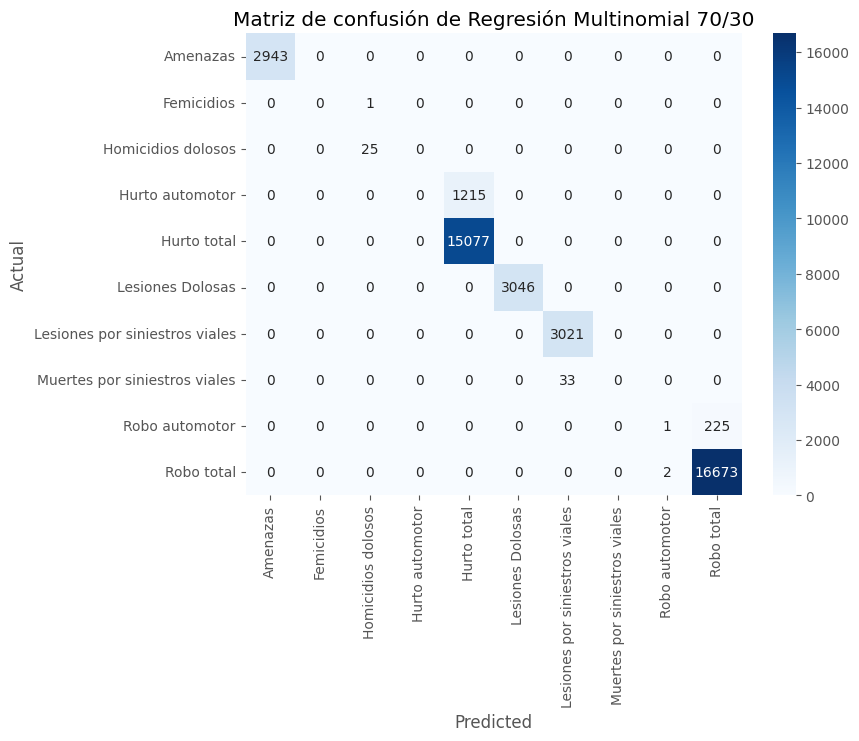

Regresión Multinomial 80/20
Accuracy: 0.96500444
Precision: 0.93237620
F1-Score: 0.94815512
Recall: 0.96500444
Accuracy en conjunto de entrenamiento: 0.96517179
                                precision    recall  f1-score   support

                      Amenazas       1.00      1.00      1.00      1962
                    Femicidios       0.00      0.00      0.00         1
            Homicidios dolosos       0.94      1.00      0.97        17
               Hurto automotor       0.00      0.00      0.00       810
                   Hurto total       0.93      1.00      0.96     10051
              Lesiones Dolosas       1.00      1.00      1.00      2031
Lesiones por siniestros viales       0.99      1.00      0.99      2014
 Muertes por siniestros viales       0.00      0.00      0.00        22
                Robo automotor       0.00      0.00      0.00       151
                    Robo total       0.99      1.00      0.99     11116

                      accuracy               

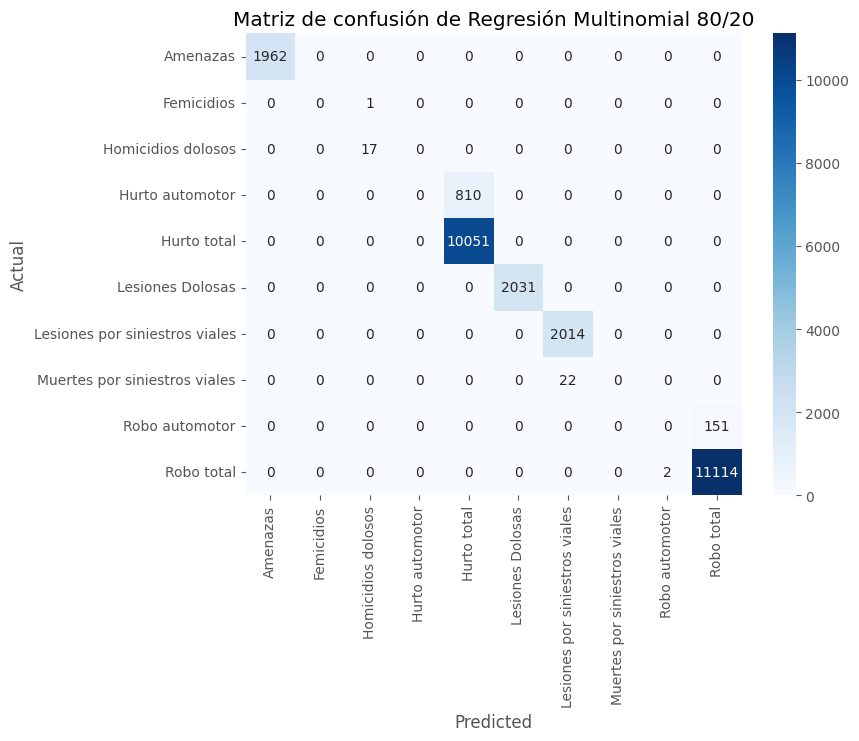

In [ ]:
# Selección del modelo a usar
model = reg_mn

# Asignación del nombre del modelo para identificarlo
model_name1 = 'Regresión Multinomial 70/30'
model_name2 = 'Regresión Multinomial 80/20'

# Nombre del archivo donde se guardarán los resultados
filename='metricas_modelo_simple.csv'

# Entrenamiento y evaluación del modelo
evaluate_and_save_metrics(model, X_train_scaled_g1, y_train_g1, X_test_scaled_g1, y_test_g1, model_name=model_name1, filename=filename)
evaluate_and_save_metrics(model, X_train_scaled_g2, y_train_g2, X_test_scaled_g2, y_test_g2, model_name=model_name2, filename=filename)

* En general, con una Accuracy de 0.9 los modelos son muy buenos prediciendo e identificando las
clases. Sin embargo, le fue imposible identificar correctamente las clases femicidios, hurto automotor y muerte por siniestros viales. Esto puede deberse a la poca cantidad de datos registrados para esas categorías. Más adelante se aborda el problema del desbalance entre las clases-

* En cuanto al robo automotor se puede concluir que, debido al bajo recall y a la alta precisión, el modelo tiene problemas para detectar la clase, pero cuando la detecta es muy precisa identificándola.

* El modelo 70/30 yuvo un desempeño ligeramente mayor en comparación con modelo 80/20.

Curva de aprendizaje Regresión Multinomial 70/30

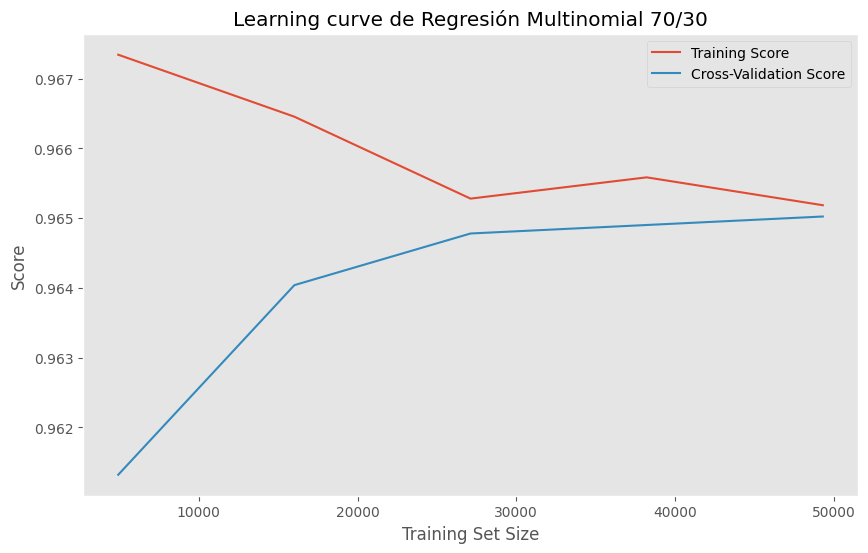

In [ ]:
# Selección del modelo a usar
model = reg_mn

# Nombre para el title
title_name='Regresión Multinomial 70/30'

# Graficar la curva de aprendizaje
plot_learning_curve(model, X_train_scaled_g1, y_train_g1, title_name=title_name, cv=2, random_state=42)

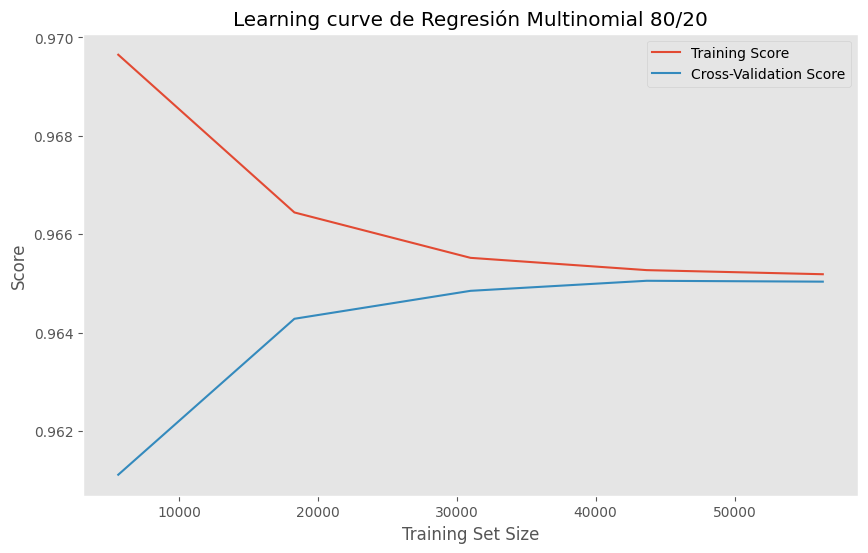

In [ ]:
# Selección del modelo a usar
model = reg_mn

# Nombre para el title
title_name='Regresión Multinomial 80/20'

# Graficar la curva de aprendizaje
plot_learning_curve(model, X_train_scaled_g2, y_train_g2, title_name=title_name, cv=2, random_state=42)

* Las curvas de entrenamiento y validación indican que el modelo generaliza bien y tiene un buen ajuste porque tienden a converger.

# Modelo de clasificación Random Forest.



Random Forest es un algoritmo de aprendizaje supervisado utilizado principalmente para tareas de clasificación y regresión en machine learning. Es una técnica de ensemble learning que combina múltiples árboles de decisión para mejorar el rendimiento predictivo y reducir el sobreajuste.

Random Forest 70/30
Accuracy: 0.95849699
Precision: 0.93803628
F1-Score: 0.94688126
Recall: 0.95849699
Accuracy en conjunto de entrenamiento: 0.98770903
                                precision    recall  f1-score   support

                      Amenazas       1.00      1.00      1.00      2943
                    Femicidios       0.00      0.00      0.00         1
            Homicidios dolosos       0.96      1.00      0.98        25
               Hurto automotor       0.13      0.04      0.06      1215
                   Hurto total       0.93      0.98      0.95     15077
              Lesiones Dolosas       1.00      1.00      1.00      3046
Lesiones por siniestros viales       0.99      1.00      0.99      3021
 Muertes por siniestros viales       0.33      0.09      0.14        33
                Robo automotor       0.20      0.04      0.06       226
                    Robo total       0.99      1.00      0.99     16675

                      accuracy                       

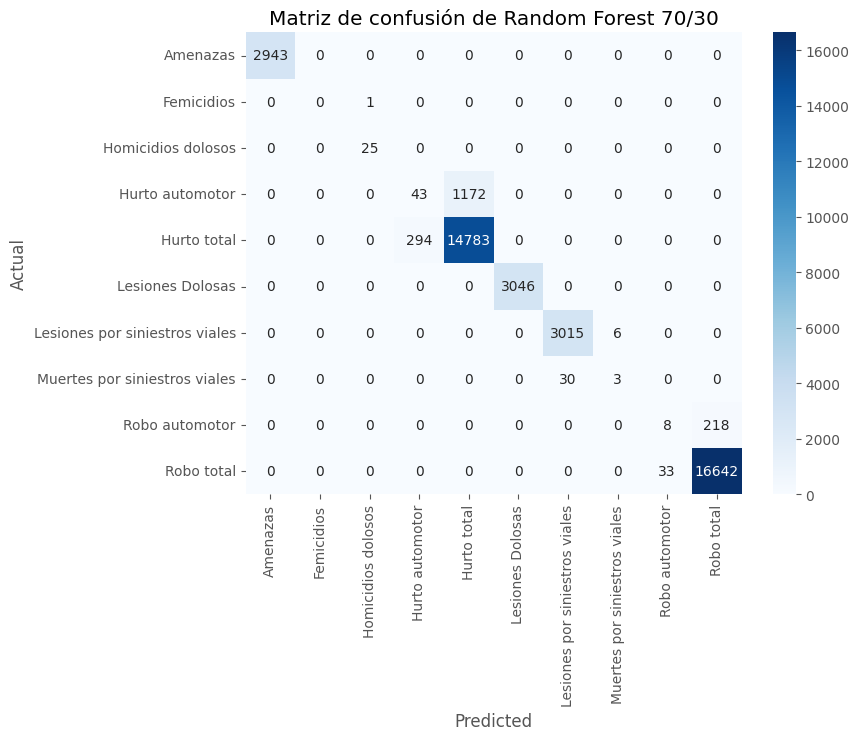

Random Forest 80/20
Accuracy: 0.95790594
Precision: 0.93801362
F1-Score: 0.94668495
Recall: 0.95790594
Accuracy en conjunto de entrenamiento: 0.98675197
                                precision    recall  f1-score   support

                      Amenazas       1.00      1.00      1.00      1962
                    Femicidios       0.00      0.00      0.00         1
            Homicidios dolosos       0.94      1.00      0.97        17
               Hurto automotor       0.12      0.04      0.06       810
                   Hurto total       0.93      0.98      0.95     10051
              Lesiones Dolosas       1.00      1.00      1.00      2031
Lesiones por siniestros viales       0.99      1.00      0.99      2014
 Muertes por siniestros viales       0.43      0.14      0.21        22
                Robo automotor       0.19      0.04      0.07       151
                    Robo total       0.99      1.00      0.99     11116

                      accuracy                       

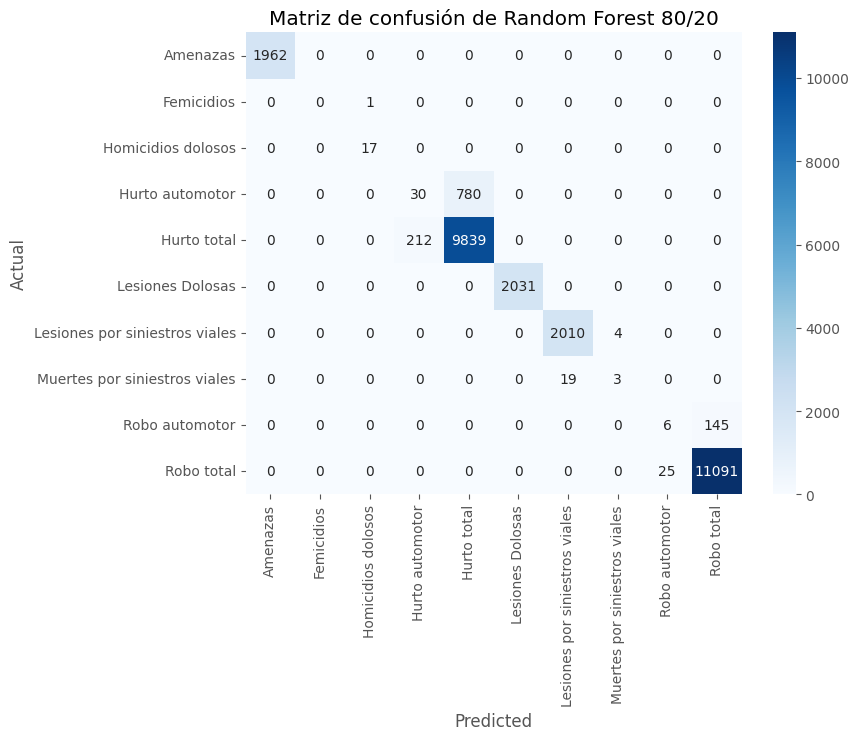

In [ ]:
# Selección del modelo a usar
model = rf_classifier

# Asignación del nombre del modelo para identificarlo
model_name1 = 'Random Forest 70/30'
model_name2 = 'Random Forest 80/20'

# Nombre del archivo donde se guardarán los resultados
filename='metricas_modelo_simple.csv'

# Entrenamiento y evaluación del modelo
evaluate_and_save_metrics(model, X_train_scaled_g1, y_train_g1, X_test_scaled_g1, y_test_g1, model_name=model_name1, filename=filename)
evaluate_and_save_metrics(model, X_train_scaled_g2, y_train_g2, X_test_scaled_g2, y_test_g2, model_name=model_name2, filename=filename)

* Con un accuracy general de 0.96 se puede concluir que el modelo se desempeñan bien.

* En comparación con el modelo de Regresión Multinomial, se desempeña ligeramente mejor en el reconocimiento de alguna de las clases minoritarias.

* El modelo 70/30 tiene un desempeño ligeramente mayor que el modelo 80/20.

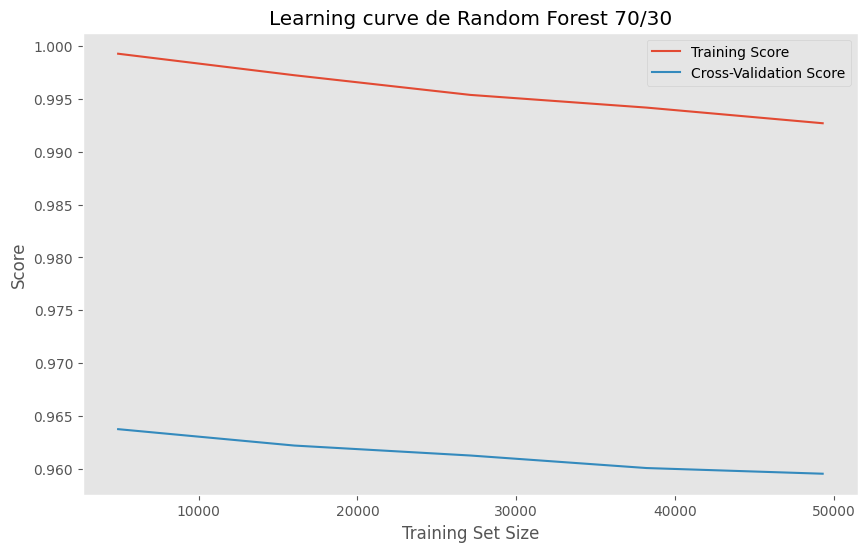

In [ ]:
# Selección del modelo a usar
model = rf_classifier

# Nombre para el title
title_name='Random Forest 70/30'

# Graficar la curva de aprendizaje
plot_learning_curve(model, X_train_scaled_g1, y_train_g1, title_name=title_name, cv=2, random_state=42)

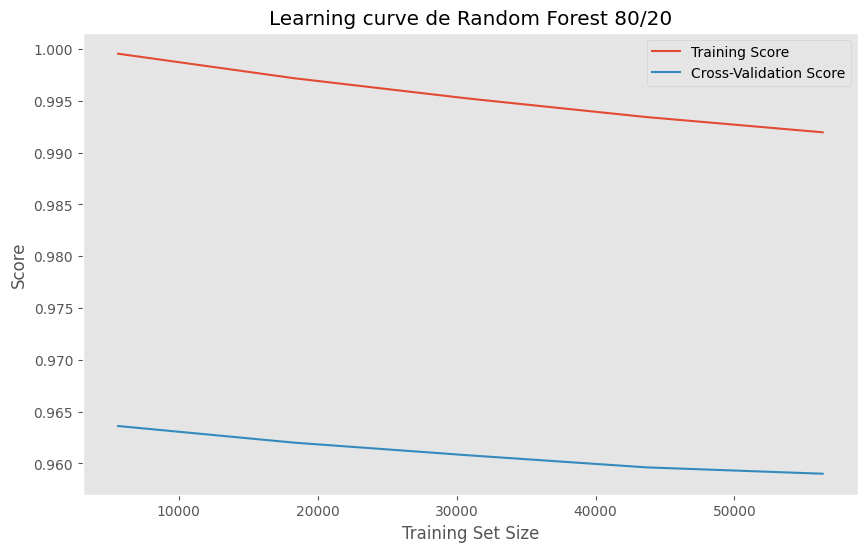

In [ ]:
# Selección del modelo a usar
model = rf_classifier

# Nombre para el title
title_name='Random Forest 80/20'

# Graficar la curva de aprendizaje
plot_learning_curve(model, X_train_scaled_g2, y_train_g2, title_name=title_name, cv=2, random_state=42)

* Las curvas de entrenamieno y validación indican que el modelo generaliza bien y es consistente.

* Las pendientes ligeramente negativas, siendo un poco mayor la de la curva de entrenamiento, nos indica que eventualmente convergerían en un puto y este nos indicaría que está en el punto óptimo de ajuste.

* Hay margen para mejorar con más entrenamiento y comlejidad del modelo.

# Modelo de clasificación Support Vector Machine (SVM)

SVM es un algoritmo de aprendizaje supervisado que se utiliza tanto para tareas de clasificación como de regresión. SVM es especialmente efectivo en espacios de alta dimensión y es popular debido a su capacidad para manejar datos lineales y no lineales.

SVM 70/30
Accuracy: 0.96509867
Precision: 0.93242221
F1-Score: 0.94822512
Recall: 0.96509867
Accuracy en conjunto de entrenamiento: 0.96512489
                                precision    recall  f1-score   support

                      Amenazas       1.00      1.00      1.00      2943
                    Femicidios       0.00      0.00      0.00         1
            Homicidios dolosos       0.96      1.00      0.98        25
               Hurto automotor       0.00      0.00      0.00      1215
                   Hurto total       0.93      1.00      0.96     15077
              Lesiones Dolosas       1.00      1.00      1.00      3046
Lesiones por siniestros viales       0.99      1.00      0.99      3021
 Muertes por siniestros viales       0.00      0.00      0.00        33
                Robo automotor       0.00      0.00      0.00       226
                    Robo total       0.99      1.00      0.99     16675

                      accuracy                           0.97  

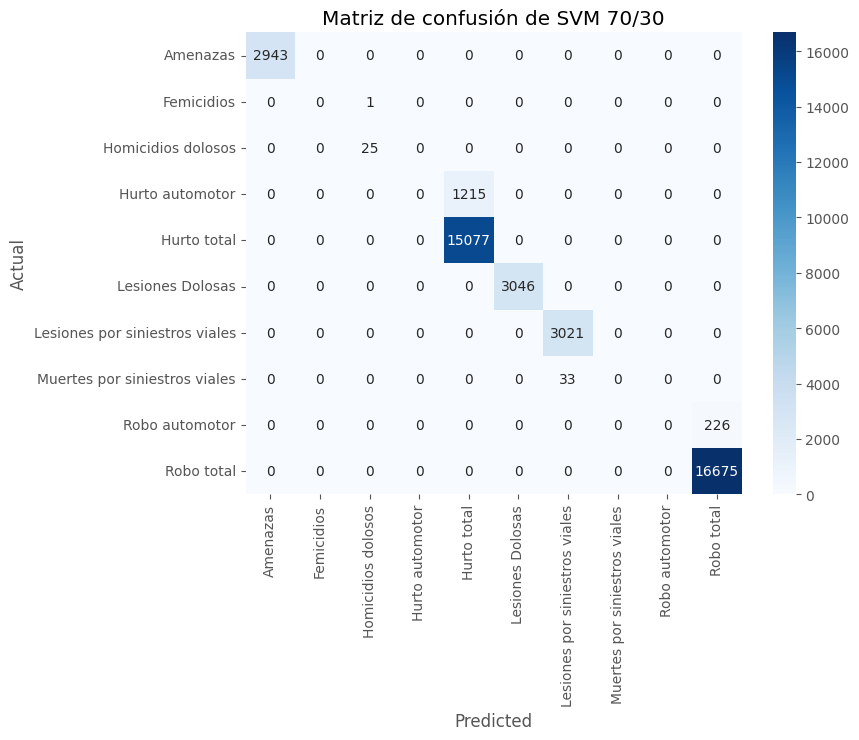

SVM 80/20
Accuracy: 0.96507542
Precision: 0.93237713
F1-Score: 0.94819061
Recall: 0.96507542
Accuracy en conjunto de entrenamiento: 0.96512742
                                precision    recall  f1-score   support

                      Amenazas       1.00      1.00      1.00      1962
                    Femicidios       0.00      0.00      0.00         1
            Homicidios dolosos       0.94      1.00      0.97        17
               Hurto automotor       0.00      0.00      0.00       810
                   Hurto total       0.93      1.00      0.96     10051
              Lesiones Dolosas       1.00      1.00      1.00      2031
Lesiones por siniestros viales       0.99      1.00      0.99      2014
 Muertes por siniestros viales       0.00      0.00      0.00        22
                Robo automotor       0.00      0.00      0.00       151
                    Robo total       0.99      1.00      0.99     11116

                      accuracy                           0.97  

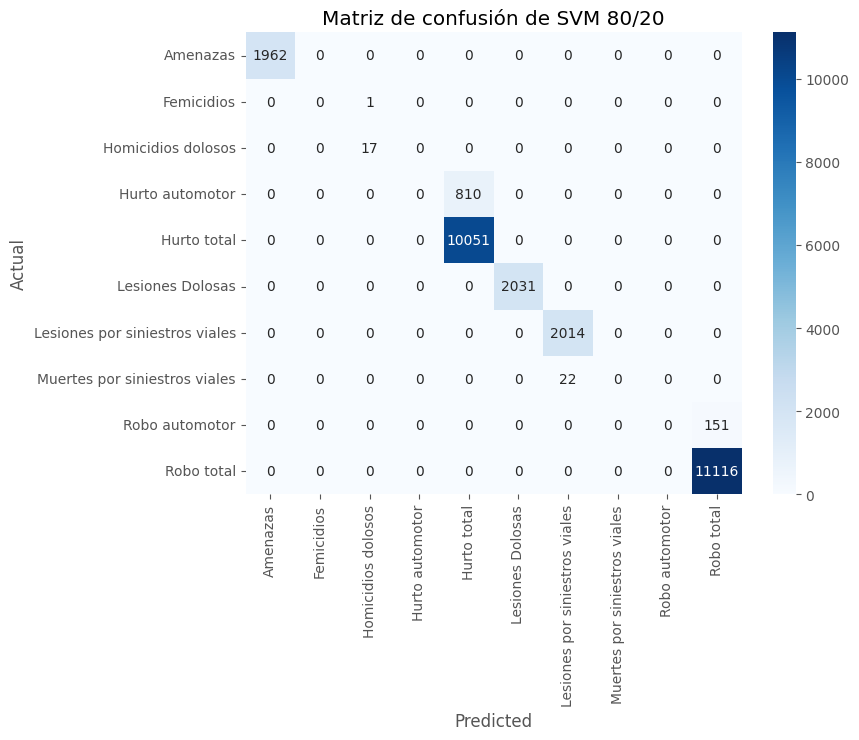

In [ ]:
# Selección del modelo a usar
model = svm_classifier

# Asignación del nombre del modelo para identificarlo
model_name1 = 'SVM 70/30'
model_name2 = 'SVM 80/20'

# Nombre del archivo donde se guardarán los resultados
filename='metricas_modelo_simple.csv'

# Entrenamiento y evaluación del modelo
evaluate_and_save_metrics(model, X_train_scaled_g1, y_train_g1, X_test_scaled_g1, y_test_g1, model_name=model_name1, filename=filename)
evaluate_and_save_metrics(model, X_train_scaled_g2, y_train_g2, X_test_scaled_g2, y_test_g2, model_name=model_name2, filename=filename)

* El accuracy de 0.96 indica que el modelo se desempeña bien.

* Sigue siendo el Random Forest el que identifica mejor las categorías menores en comparación con los modelos evaluados hasta ahora.

* El modelo 70/30 se desempeña mejor que le modeki 80/20.

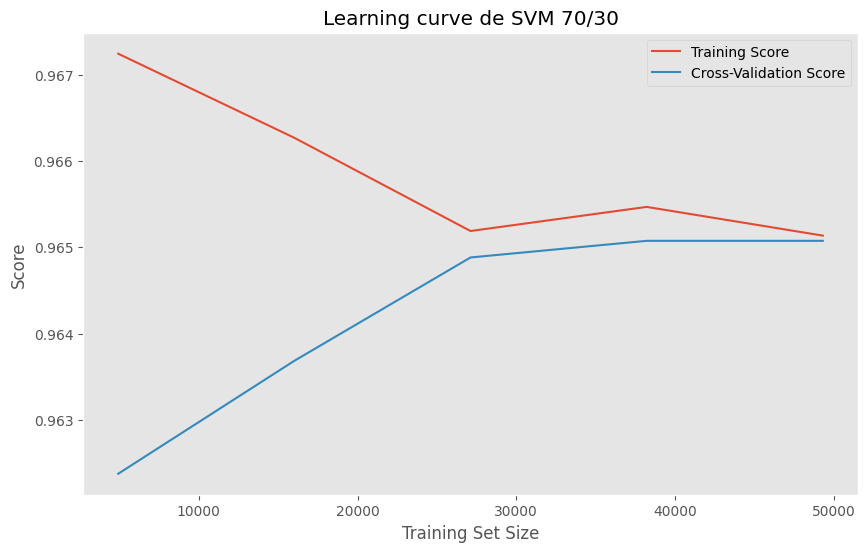

In [ ]:
# Selección del modelo a usar
model = svm_classifier

# Nombre para el title
title_name='SVM 70/30'

# Graficar la curva de aprendizaje
plot_learning_curve(model, X_train_scaled_g1, y_train_g1, title_name=title_name, cv=2, random_state=42)

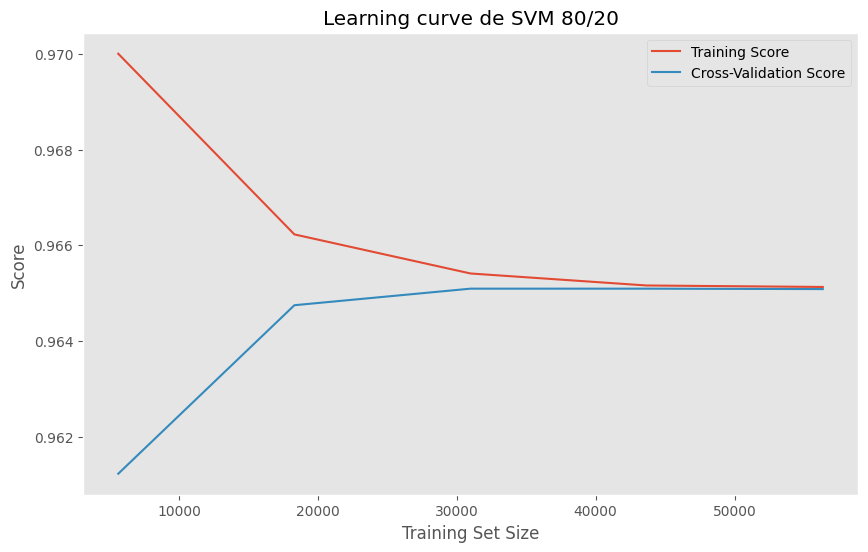

In [ ]:
# Selección del modelo a usar
model = svm_classifier

# Nombre para el title
title_name='SVM 80/20'

# Graficar la curva de aprendizaje
plot_learning_curve(model, X_train_scaled_g2, y_train_g2, title_name=title_name, cv=2, random_state=42)

* Las curvas de entrenamiento y validación indican que el modelo generaliza bien y que están ajustados porque tienden a la convergencia.

# Modelo de clasificación CatBoost

CatBoost 70/30
Accuracy: 0.96502768
Precision: 0.93351352
F1-Score: 0.94823577
Recall: 0.96502768
Accuracy en conjunto de entrenamiento: 0.96537841
                                precision    recall  f1-score   support

                      Amenazas       1.00      1.00      1.00      2943
                    Femicidios       0.00      0.00      0.00         1
            Homicidios dolosos       0.96      1.00      0.98        25
               Hurto automotor       0.00      0.00      0.00      1215
                   Hurto total       0.93      1.00      0.96     15077
              Lesiones Dolosas       1.00      1.00      1.00      3046
Lesiones por siniestros viales       0.99      1.00      0.99      3021
 Muertes por siniestros viales       0.00      0.00      0.00        33
                Robo automotor       0.20      0.00      0.01       226
                    Robo total       0.99      1.00      0.99     16675

                      accuracy                           0

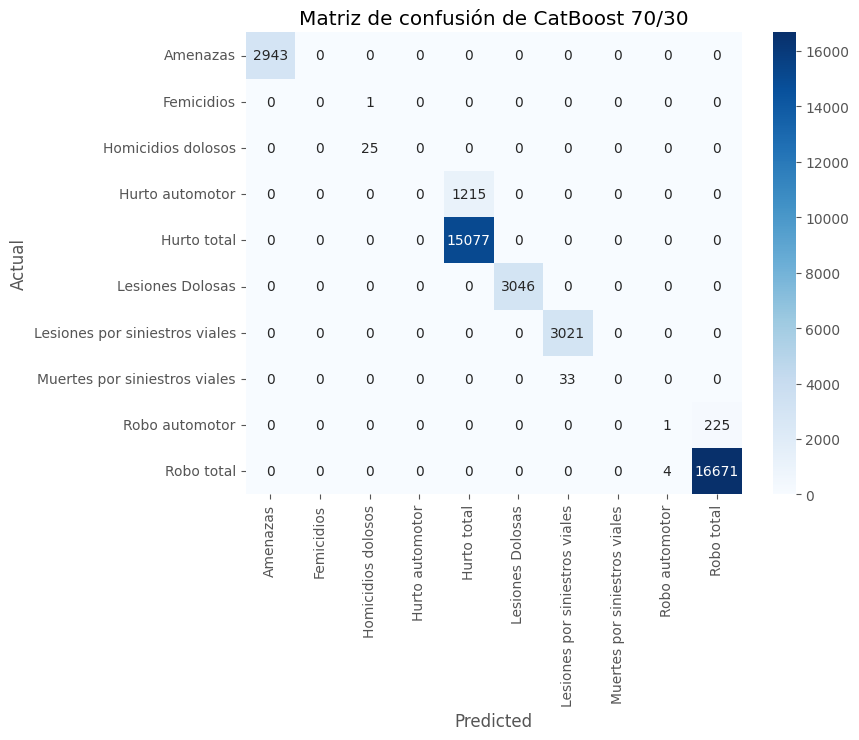

CatBoost 80/20
Accuracy: 0.96489796
Precision: 0.93237479
F1-Score: 0.94810187
Recall: 0.96489796
Accuracy en conjunto de entrenamiento: 0.96538475
                                precision    recall  f1-score   support

                      Amenazas       1.00      1.00      1.00      1962
                    Femicidios       0.00      0.00      0.00         1
            Homicidios dolosos       0.94      1.00      0.97        17
               Hurto automotor       0.00      0.00      0.00       810
                   Hurto total       0.93      1.00      0.96     10051
              Lesiones Dolosas       1.00      1.00      1.00      2031
Lesiones por siniestros viales       0.99      1.00      0.99      2014
 Muertes por siniestros viales       0.00      0.00      0.00        22
                Robo automotor       0.00      0.00      0.00       151
                    Robo total       0.99      1.00      0.99     11116

                      accuracy                           0

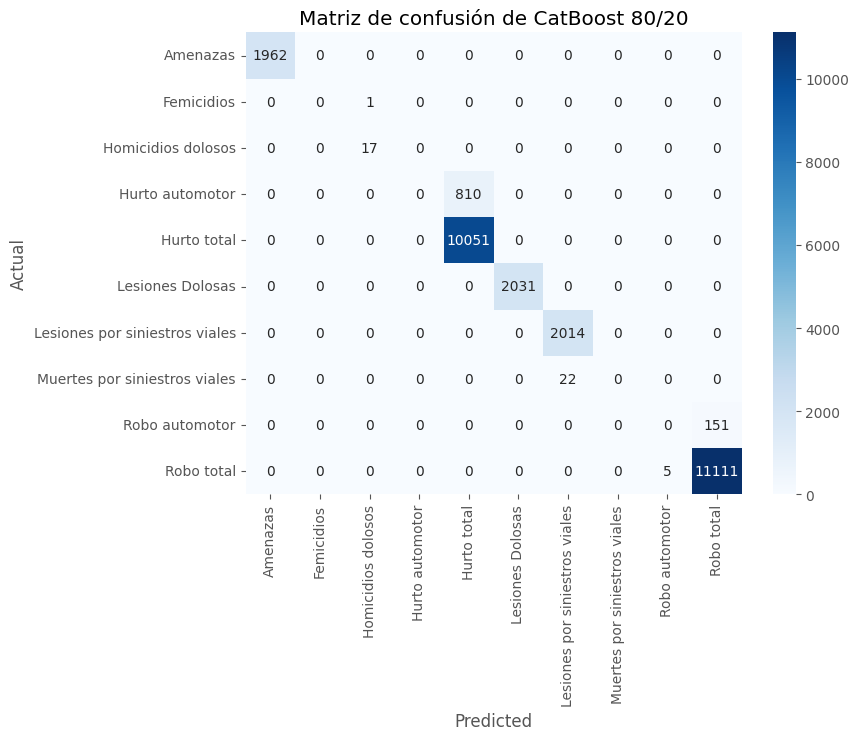

In [ ]:
# Selección del modelo a usar
model = catboost

# Asignación del nombre del modelo para identificarlo
model_name1 = 'CatBoost 70/30'
model_name2 = 'CatBoost 80/20'

# Nombre del archivo donde se guardarán los resultados
filename='metricas_modelo_simple.csv'

# Entrenamiento y evaluación del modelo
evaluate_and_save_metrics(model, X_train_scaled_g1, y_train_g1, X_test_scaled_g1, y_test_g1, model_name=model_name1, filename=filename)
evaluate_and_save_metrics(model, X_train_scaled_g2, y_train_g2, X_test_scaled_g2, y_test_g2, model_name=model_name2, filename=filename)

* Con 0.96 de accuracy se puede decir que el modelo generaliza bien.

* En cuanto a las categorías minoritarias, el modelo Random Forest es el que identifica más clases entre los modelos simples.

* El modelos de 70/30 se desmpeña ligeramente mejor que el 80/20.

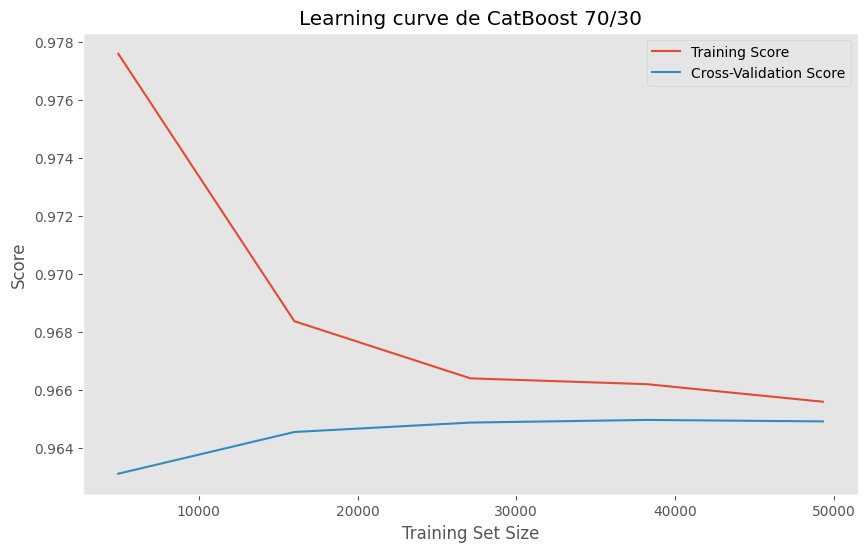

In [ ]:
# Selección del modelo a usar
model = catboost

# Nombre para el title
title_name='CatBoost 70/30'

# Graficar la curva de aprendizaje
plot_learning_curve(model, X_train_scaled_g1, y_train_g1, title_name=title_name, cv=2, random_state=42)

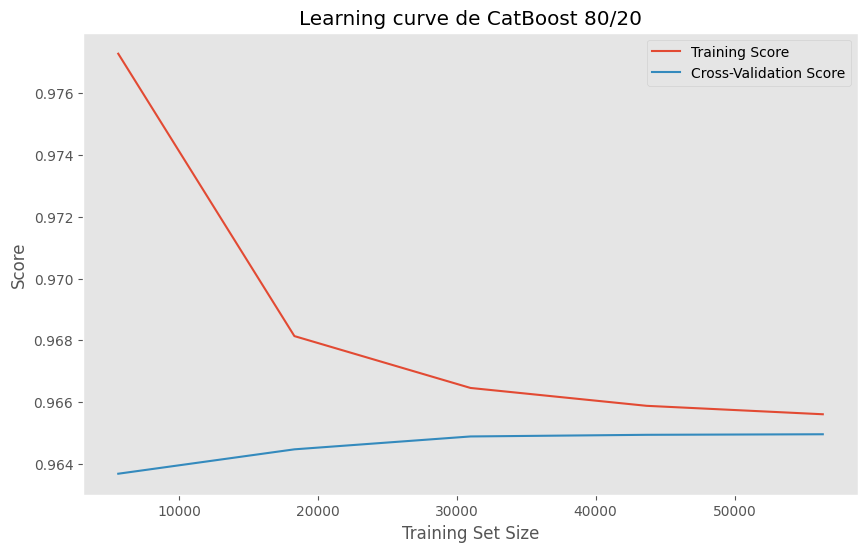

In [ ]:
# Selección del modelo a usar
model = catboost

# Nombre para el title
title_name='CatBoost 80/20'

# Graficar la curva de aprendizaje
plot_learning_curve(model, X_train_scaled_g2, y_train_g2, title_name=title_name, cv=2, random_state=42)

* Las curvas de entrenamiento y validación indican que el modelo está cerca del punto óptimo de ajuste por la disminución de la curva de entrenamiento tendiendo a un valor estable definido por la curva de validación.

In [ ]:
# Esta celda imprime el archivo csv
# Nombre del archivo CSV
filename='metricas_modelo_simple.csv'
load_and_display_metrics(filename)

+-----------------------------+------------+-------------+------------------+------------+----------+
| Model                       |   Accuracy |   Precision |   Accuracy train |   F1_score |   Recall |
+=============================+============+=============+==================+============+==========+
| Regresión Multinomial 70/30 |   0.965075 |    0.934227 |         0.965176 |   0.94826  | 0.965075 |
+-----------------------------+------------+-------------+------------------+------------+----------+
| Regresión Multinomial 80/20 |   0.965004 |    0.932376 |         0.965172 |   0.948155 | 0.965004 |
+-----------------------------+------------+-------------+------------------+------------+----------+
| Random Forest 70/30         |   0.958497 |    0.938036 |         0.987709 |   0.946881 | 0.958497 |
+-----------------------------+------------+-------------+------------------+------------+----------+
| Random Forest 80/20         |   0.957906 |    0.938014 |         0.986752 |   0.

# SMOTE (Synthetic Minority Over-sampling Technique)

## SMOTE para el modelo de regresión multinomial 70/30.

Regresión Multinomial 70/30
Antes del balanceo:
subtipo
Robo total                        38906
Hurto total                       35178
Lesiones Dolosas                   7107
Lesiones por siniestros viales     7049
Amenazas                           6868
Hurto automotor                    2834
Robo automotor                      527
Muertes por siniestros viales        78
Homicidios dolosos                   58
Femicidios                            4
Name: count, dtype: int64
Después del balanceo:
subtipo
Amenazas                          38906
Femicidios                        38906
Homicidios dolosos                38906
Hurto automotor                   38906
Hurto total                       38906
Lesiones Dolosas                  38906
Lesiones por siniestros viales    38906
Muertes por siniestros viales     38906
Robo automotor                    38906
Robo total                        38906
Name: count, dtype: int64
Accuracy: 0.75739435
Precision: 0.94995026
F1-Score: 0.8222307

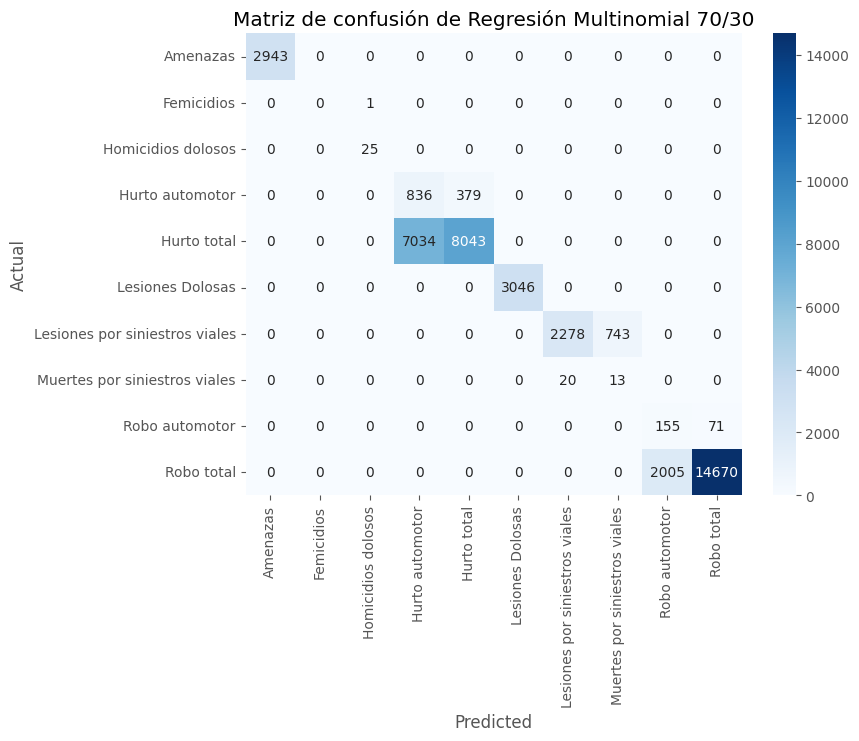

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo_smote.csv


In [ ]:
# Selección del modelo a usar
model = reg_mn

model_name = 'Regresión Multinomial 70/30'

filename='metricas_modelo_smote.csv'

apply_smote_and_evaluate(model, X_train_scaled_g1, y_train_g1, X_test_scaled_g1, y_test_g1, model_name=model_name, filename=filename)

## SMOTE para el modelo de regresión multinomial 80/20.

Regresión Multinomial 80/20
Antes del balanceo:
subtipo
Robo total                        44465
Hurto total                       40204
Lesiones Dolosas                   8122
Lesiones por siniestros viales     8056
Amenazas                           7849
Hurto automotor                    3239
Robo automotor                      602
Muertes por siniestros viales        89
Homicidios dolosos                   66
Femicidios                            4
Name: count, dtype: int64
Después del balanceo:
subtipo
Amenazas                          44465
Femicidios                        44465
Homicidios dolosos                44465
Hurto automotor                   44465
Hurto total                       44465
Lesiones Dolosas                  44465
Lesiones por siniestros viales    44465
Muertes por siniestros viales     44465
Robo automotor                    44465
Robo total                        44465
Name: count, dtype: int64
Accuracy: 0.75187223
Precision: 0.95039568
F1-Score: 0.8187701

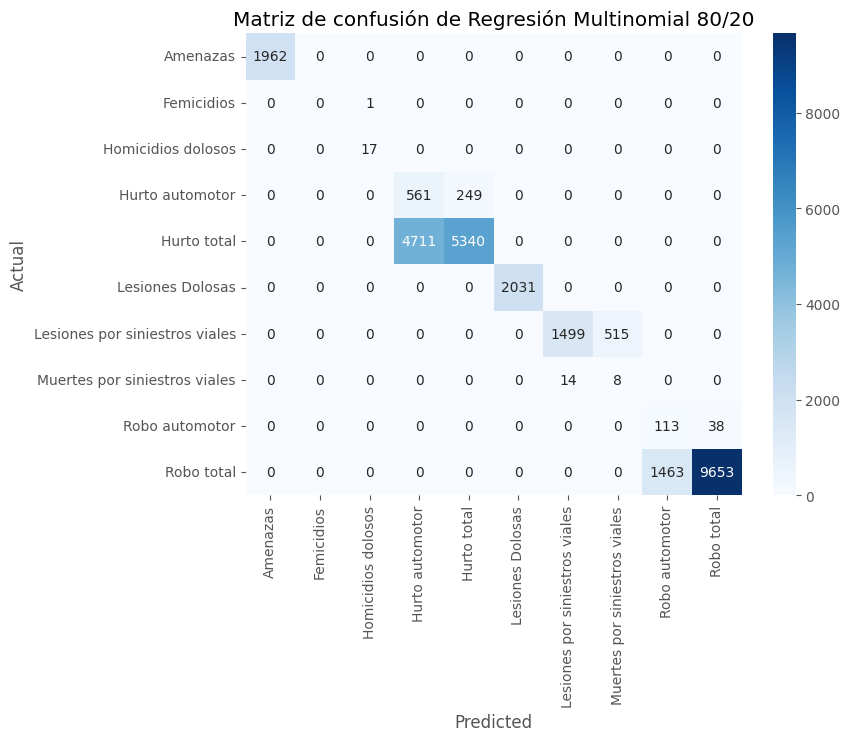

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo_smote.csv


In [ ]:
# Selección del modelo a usar
model = reg_mn

model_name = 'Regresión Multinomial 80/20'

filename='metricas_modelo_smote.csv'

apply_smote_and_evaluate(model, X_train_scaled_g2, y_train_g2, X_test_scaled_g2, y_test_g2, model_name=model_name, filename=filename)

## SMOTE para el modelo de Random Forest 70/30.

Random Forest 70/30
Antes del balanceo:
subtipo
Robo total                        38906
Hurto total                       35178
Lesiones Dolosas                   7107
Lesiones por siniestros viales     7049
Amenazas                           6868
Hurto automotor                    2834
Robo automotor                      527
Muertes por siniestros viales        78
Homicidios dolosos                   58
Femicidios                            4
Name: count, dtype: int64
Después del balanceo:
subtipo
Amenazas                          38906
Femicidios                        38906
Homicidios dolosos                38906
Hurto automotor                   38906
Hurto total                       38906
Lesiones Dolosas                  38906
Lesiones por siniestros viales    38906
Muertes por siniestros viales     38906
Robo automotor                    38906
Robo total                        38906
Name: count, dtype: int64
Accuracy: 0.95764517
Precision: 0.93782809
F1-Score: 0.94651036
Recall

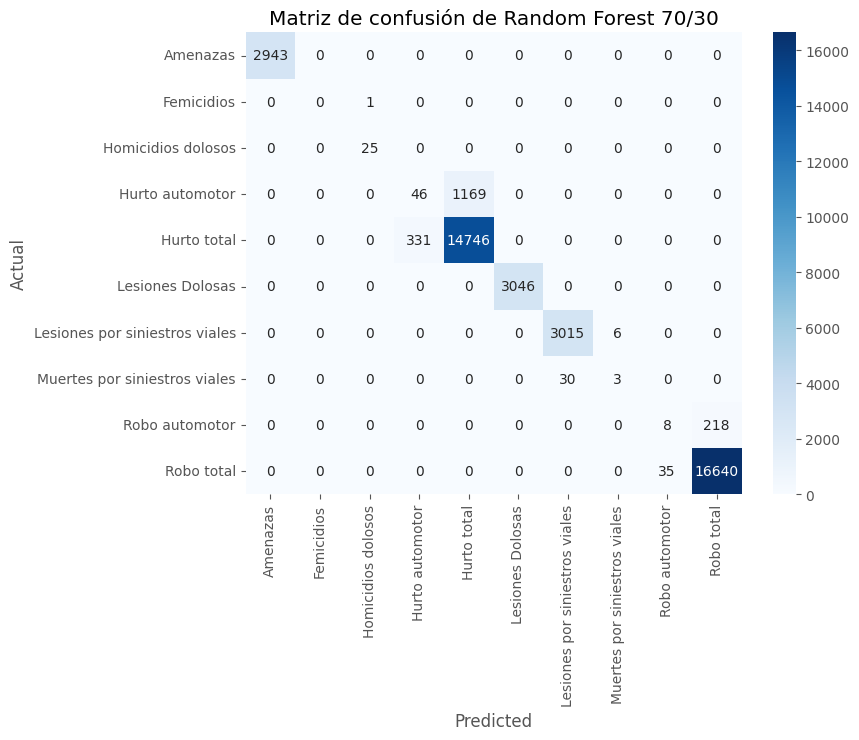

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo_smote.csv


In [ ]:
model = rf_classifier

model_name = 'Random Forest 70/30'

filename='metricas_modelo_smote.csv'

apply_smote_and_evaluate(model, X_train_scaled_g1, y_train_g1, X_test_scaled_g1, y_test_g1, model_name=model_name, filename=filename)

## SMOTE para el modelo de Random Forest 80/20.

Random Forest 80/20
Antes del balanceo:
subtipo
Robo total                        44465
Hurto total                       40204
Lesiones Dolosas                   8122
Lesiones por siniestros viales     8056
Amenazas                           7849
Hurto automotor                    3239
Robo automotor                      602
Muertes por siniestros viales        89
Homicidios dolosos                   66
Femicidios                            4
Name: count, dtype: int64
Después del balanceo:
subtipo
Amenazas                          44465
Femicidios                        44465
Homicidios dolosos                44465
Hurto automotor                   44465
Hurto total                       44465
Lesiones Dolosas                  44465
Lesiones por siniestros viales    44465
Muertes por siniestros viales     44465
Robo automotor                    44465
Robo total                        44465
Name: count, dtype: int64
Accuracy: 0.95716060
Precision: 0.93760004
F1-Score: 0.94626687
Recall

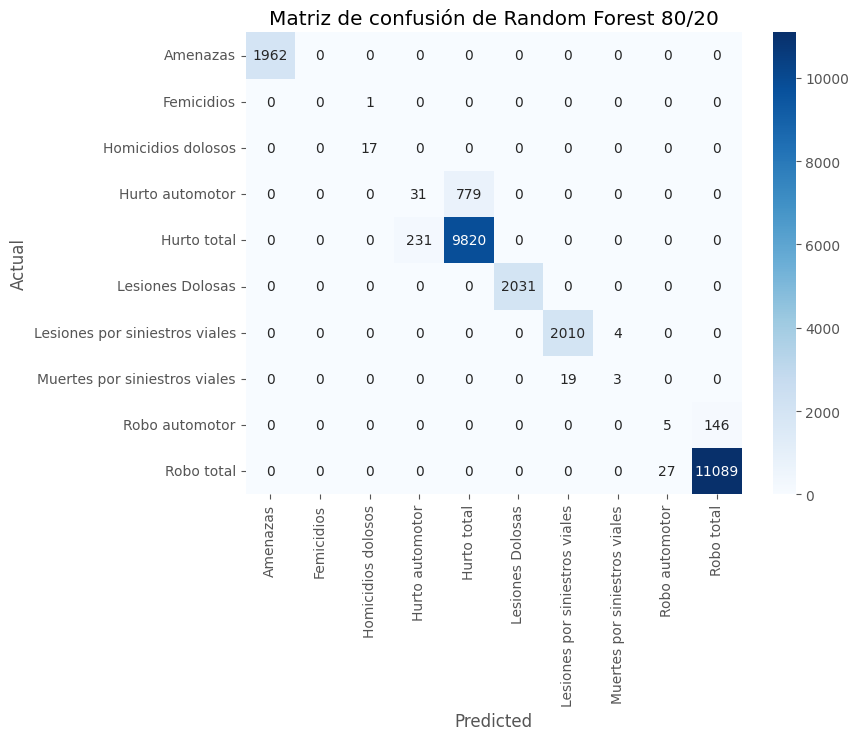

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo_smote.csv


In [ ]:
# Selección del modelo a usar
model = rf_classifier

model_name = 'Random Forest 80/20'

filename='metricas_modelo_smote.csv'

apply_smote_and_evaluate(model, X_train_scaled_g2, y_train_g2, X_test_scaled_g2, y_test_g2, model_name=model_name, filename=filename)

## SMOTE para el modelo SVM 70/30.

SVM 70/30
Antes del balanceo:
subtipo
Robo total                        38906
Hurto total                       35178
Lesiones Dolosas                   7107
Lesiones por siniestros viales     7049
Amenazas                           6868
Hurto automotor                    2834
Robo automotor                      527
Muertes por siniestros viales        78
Homicidios dolosos                   58
Femicidios                            4
Name: count, dtype: int64
Después del balanceo:
subtipo
Amenazas                          38906
Femicidios                        38906
Homicidios dolosos                38906
Hurto automotor                   38906
Hurto total                       38906
Lesiones Dolosas                  38906
Lesiones por siniestros viales    38906
Muertes por siniestros viales     38906
Robo automotor                    38906
Robo total                        38906
Name: count, dtype: int64
Accuracy: 0.72732005
Precision: 0.95270245
F1-Score: 0.79472576
Recall: 0.727320

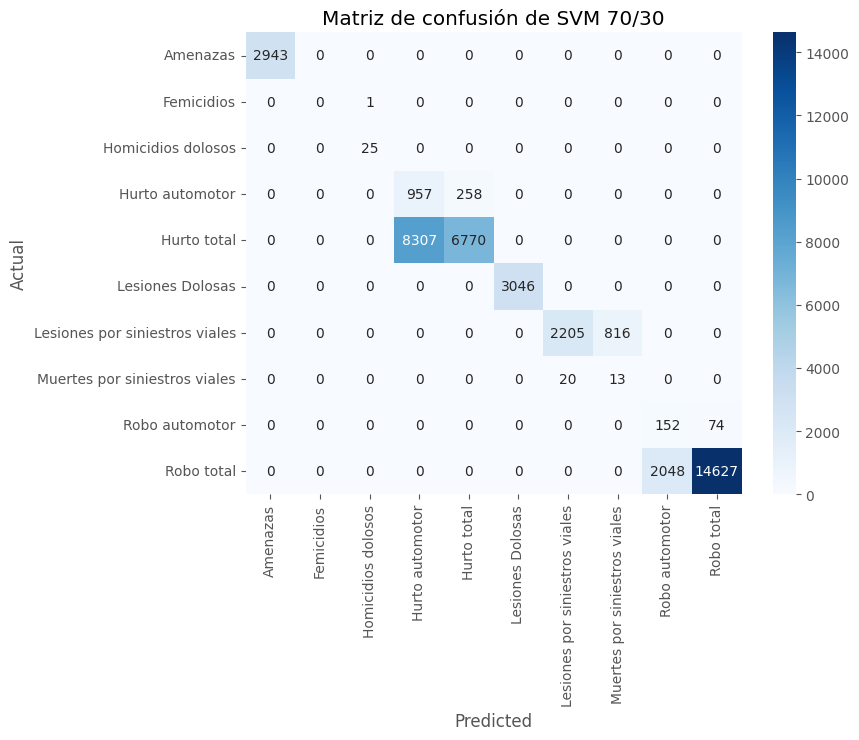

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo_smote.csv


In [ ]:
# Selección del modelo a usar
model = svm_classifier

model_name = 'SVM 70/30'

filename='metricas_modelo_smote.csv'

apply_smote_and_evaluate(model, X_train_scaled_g1, y_train_g1, X_test_scaled_g1, y_test_g1, model_name=model_name, filename=filename)

## SMOTE para el modelo de SVM 80/20.

In [ ]:
# Selección del modelo a usar
model = svm_classifier

model_name = 'SVM 80/20'

filename='metricas_modelo_smote.csv'

apply_smote_and_evaluate(model, X_train_scaled_g2, y_train_g2, X_test_scaled_g2, y_test_g2, model_name=model_name, filename=filename)

SVM 80/20
Antes del balanceo:
subtipo
Robo total                        44465
Hurto total                       40204
Lesiones Dolosas                   8122
Lesiones por siniestros viales     8056
Amenazas                           7849
Hurto automotor                    3239
Robo automotor                      602
Muertes por siniestros viales        89
Homicidios dolosos                   66
Femicidios                            4
Name: count, dtype: int64
Después del balanceo:
subtipo
Amenazas                          44465
Femicidios                        44465
Homicidios dolosos                44465
Hurto automotor                   44465
Hurto total                       44465
Lesiones Dolosas                  44465
Lesiones por siniestros viales    44465
Muertes por siniestros viales     44465
Robo automotor                    44465
Robo total                        44465
Name: count, dtype: int64


🛑 No se obtuvieron valores por cuestiones de tiempo. El modelo se estuvo ejecutando aproximadamente dos veces por más de 12 horas y Google Drive cerró el runtime antes de obtener alguna métrica.

## SMOTE para el modelo CatBoost 70/30.

CatBoost 70/30
Antes del balanceo:
subtipo
Robo total                        38906
Hurto total                       35178
Lesiones Dolosas                   7107
Lesiones por siniestros viales     7049
Amenazas                           6868
Hurto automotor                    2834
Robo automotor                      527
Muertes por siniestros viales        78
Homicidios dolosos                   58
Femicidios                            4
Name: count, dtype: int64
Después del balanceo:
subtipo
Amenazas                          38906
Femicidios                        38906
Homicidios dolosos                38906
Hurto automotor                   38906
Hurto total                       38906
Lesiones Dolosas                  38906
Lesiones por siniestros viales    38906
Muertes por siniestros viales     38906
Robo automotor                    38906
Robo total                        38906
Name: count, dtype: int64
Accuracy: 0.96412853
Precision: 0.93695893
F1-Score: 0.94833078
Recall: 0.9

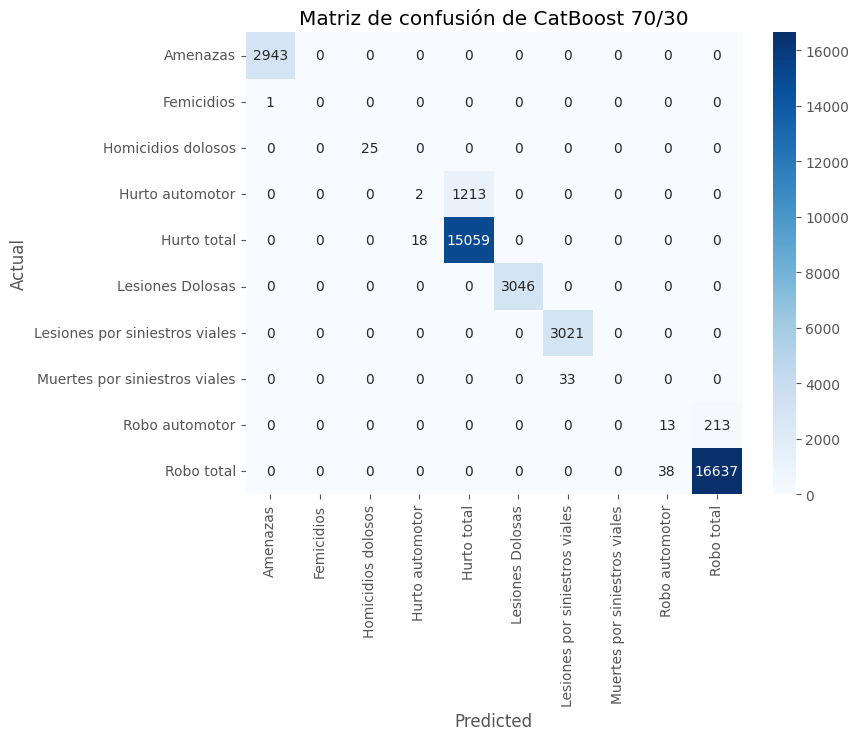

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo_smote.csv


In [ ]:
# Selección del modelo a usar
model = catboost

model_name = 'CatBoost 70/30'

filename='metricas_modelo_smote.csv'

apply_smote_and_evaluate(model, X_train_scaled_g1, y_train_g1, X_test_scaled_g1, y_test_g1, model_name=model_name, filename=filename)

## SMOTE para el modelo de CatBoost 80/20.

CatBoost 80/20
Antes del balanceo:
subtipo
Robo total                        44465
Hurto total                       40204
Lesiones Dolosas                   8122
Lesiones por siniestros viales     8056
Amenazas                           7849
Hurto automotor                    3239
Robo automotor                      602
Muertes por siniestros viales        89
Homicidios dolosos                   66
Femicidios                            4
Name: count, dtype: int64
Después del balanceo:
subtipo
Amenazas                          44465
Femicidios                        44465
Homicidios dolosos                44465
Hurto automotor                   44465
Hurto total                       44465
Lesiones Dolosas                  44465
Lesiones por siniestros viales    44465
Muertes por siniestros viales     44465
Robo automotor                    44465
Robo total                        44465
Name: count, dtype: int64
Accuracy: 0.96433008
Precision: 0.94686399
F1-Score: 0.94852315
Recall: 0.9

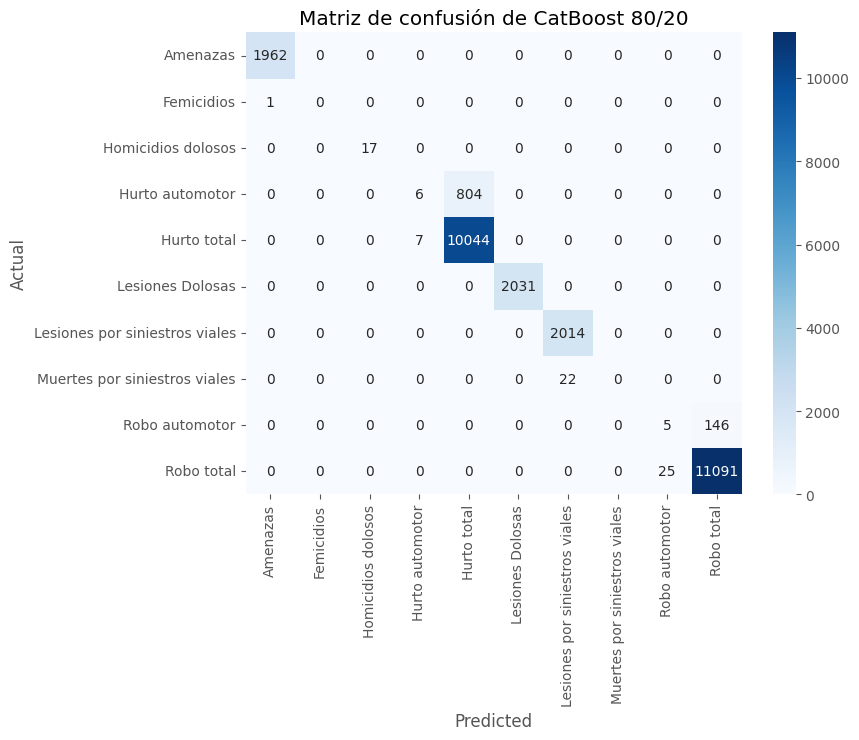

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo_smote.csv


In [ ]:
# Selección del modelo a usar
model = catboost

model_name = 'CatBoost 80/20'

filename='metricas_modelo_smote.csv'

apply_smote_and_evaluate(model, X_train_scaled_g2, y_train_g2, X_test_scaled_g2, y_test_g2, model_name=model_name, filename=filename)

In [ ]:
# Esta celda imprime el archivo csv
# Nombre del archivo CSV
filename='metricas_modelo_smote.csv'
load_and_display_metrics(filename)

+-----------------------------+------------+-------------+------------------+------------+----------+
| Model                       |   Accuracy |   Precision |   Accuracy train |   F1_score |   Recall |
+=============================+============+=============+==================+============+==========+
| Regresión Multinomial 70/30 |   0.757394 |    0.94995  |         0.871567 |   0.822231 | 0.757394 |
+-----------------------------+------------+-------------+------------------+------------+----------+
| Regresión Multinomial 80/20 |   0.751872 |    0.950396 |         0.866785 |   0.81877  | 0.751872 |
+-----------------------------+------------+-------------+------------------+------------+----------+
| Random Forest 70/30         |   0.957645 |    0.937828 |         0.996887 |   0.94651  | 0.957645 |
+-----------------------------+------------+-------------+------------------+------------+----------+
| Random Forest 80/20         |   0.957161 |    0.9376   |         0.99662  |   0.

* La diferencia entre clases es muy significativa. La generación artificial de muestras introdujo mucho ruido en los datos.

 * El sobremuestreo mediante SMOTE redujo el rendimiento en todos los modelos, especialmente en SVM y Regresión Multinomial, debido a la introducción de ruido y a que no refleja adecuadamente la distribución real de las clases. Esto provocó un deterioro en las métricas de evaluación, influenciado por la manera en que cada modelo maneja estas instancias sintéticas.

# PCA (Principal components analysis)

PCA es una técnica matemática que reduce la complejidad de los datos al identificar y preservar las direcciones (o componentes principales) a lo largo de las cuales los datos muestran la mayor variabilidad.

## PCA para la regresión multinomial.

Cargas de las componentes principales:
         mes1  dia_DOMINGO  dia_JUEVES  dia_LUNES  dia_MARTES  dia_MIERCOLES  \
PC1 -0.029729     0.017299   -0.006726  -0.002454   -0.005466      -0.000538   
PC2  0.008834    -0.055994    0.017035  -0.006914    0.022322       0.017110   

     dia_SABADO  dia_VIERNES  franja_0.0  franja_1.0  ...  \
PC1    0.000974    -0.001667   -0.001097    0.014893  ...   
PC2   -0.006622     0.008277   -0.012392   -0.040674  ...   

     barrio_VILLA RIACHUELO  barrio_VILLA SANTA RITA  barrio_VILLA SOLDATI  \
PC1               -0.002829                -0.012154              0.031512   
PC2               -0.014327                 0.007862             -0.070625   

     barrio_VILLA URQUIZA  tipo_Amenazas  tipo_Homicidios  tipo_Hurto  \
PC1             -0.017965      -0.065805        -0.004183   -0.313997   
PC2              0.021176      -0.031407        -0.012105    0.072591   

     tipo_Lesiones  tipo_Robo  tipo_Vialidad  
PC1      -0.063484   0.422175     

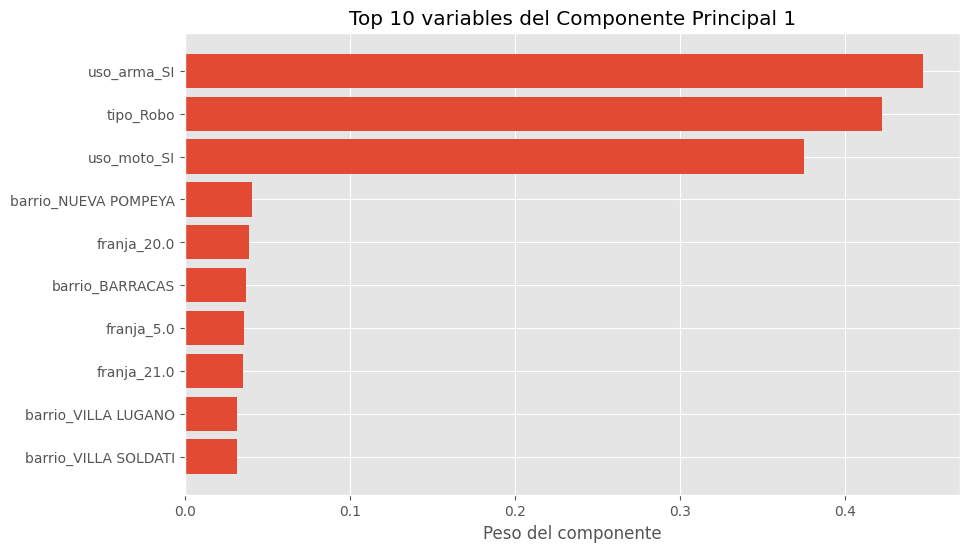

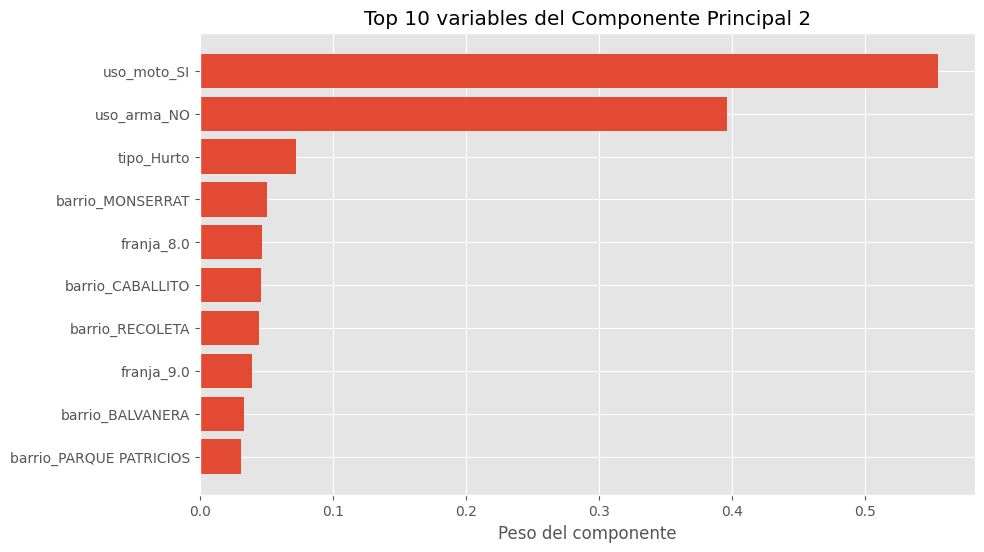

Accuracy: 0.80280157
Precision: 0.74916450
F1-Score: 0.76844043
Recall: 0.80280157
Accuracy en conjunto de entrenamiento: 0.80013995
                                precision    recall  f1-score   support

                      Amenazas       0.27      0.09      0.13      2946
                    Femicidios       0.00      0.00      0.00         2
            Homicidios dolosos       0.00      0.00      0.00        32
               Hurto automotor       0.00      0.00      0.00      1213
                   Hurto total       0.78      0.96      0.86     15081
              Lesiones Dolosas       0.44      0.54      0.48      3065
Lesiones por siniestros viales       0.43      0.31      0.36      3030
 Muertes por siniestros viales       0.00      0.00      0.00        28
                Robo automotor       0.00      0.00      0.00       205
                    Robo total       0.99      1.00      0.99     16660

                      accuracy                           0.80     42262
 

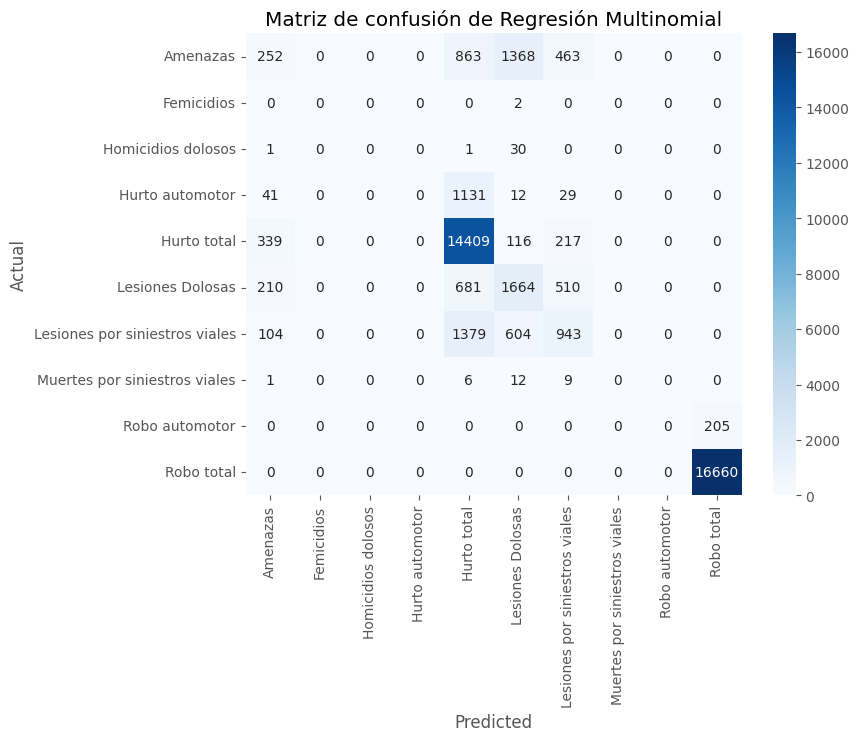

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo_pca.csv


In [ ]:
# Selección del modelo a usar
model = reg_mn

# Asignación del nombre del modelo para identificarlo
model_name = 'Regresión Multinomial'

# Nombre del archivo donde se guardarán los resultados
filename='metricas_modelo_pca.csv'

#
df = df

# Definición de la columna target
target_column = 'subtipo'


pca_evaluation_and_save_metrics(df, target_column, model, model_name=model_name, filename=filename)

## PCA para el Random Forest

Cargas de las componentes principales:
         mes1  dia_DOMINGO  dia_JUEVES  dia_LUNES  dia_MARTES  dia_MIERCOLES  \
PC1 -0.029543     0.017714   -0.007175  -0.002911   -0.005227      -0.000685   
PC2  0.009130    -0.054061    0.028161  -0.002395    0.020592       0.006213   

     dia_SABADO  dia_VIERNES  franja_0.0  franja_1.0  ...  \
PC1    0.001206    -0.001469   -0.001213    0.014865  ...   
PC2   -0.009724     0.006558   -0.011617   -0.030323  ...   

     barrio_VILLA RIACHUELO  barrio_VILLA SANTA RITA  barrio_VILLA SOLDATI  \
PC1               -0.002919                -0.012345              0.031331   
PC2               -0.015052                 0.010762             -0.066783   

     barrio_VILLA URQUIZA  tipo_Amenazas  tipo_Homicidios  tipo_Hurto  \
PC1             -0.018040      -0.065917        -0.004259   -0.313921   
PC2              0.019872      -0.031472        -0.002543    0.085110   

     tipo_Lesiones  tipo_Robo  tipo_Vialidad  
PC1      -0.063444   0.422283     

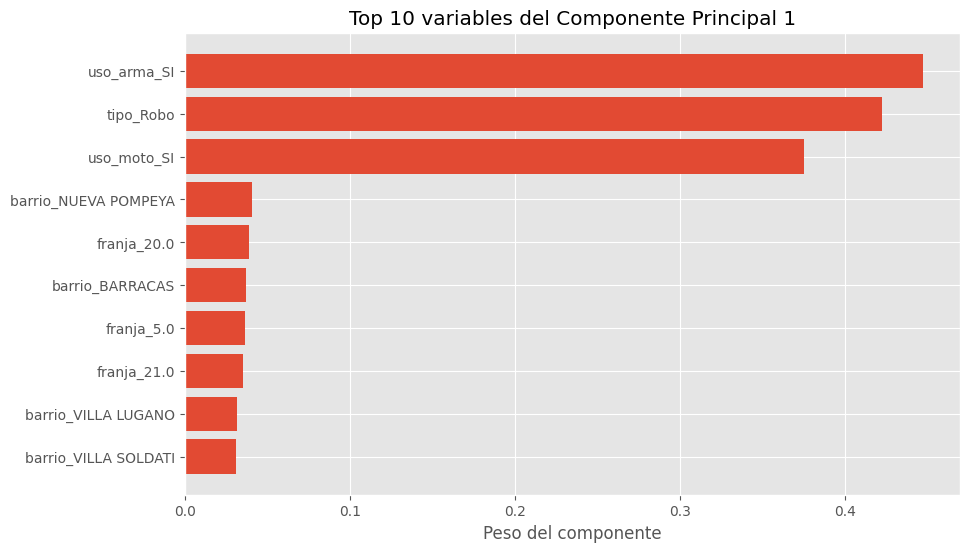

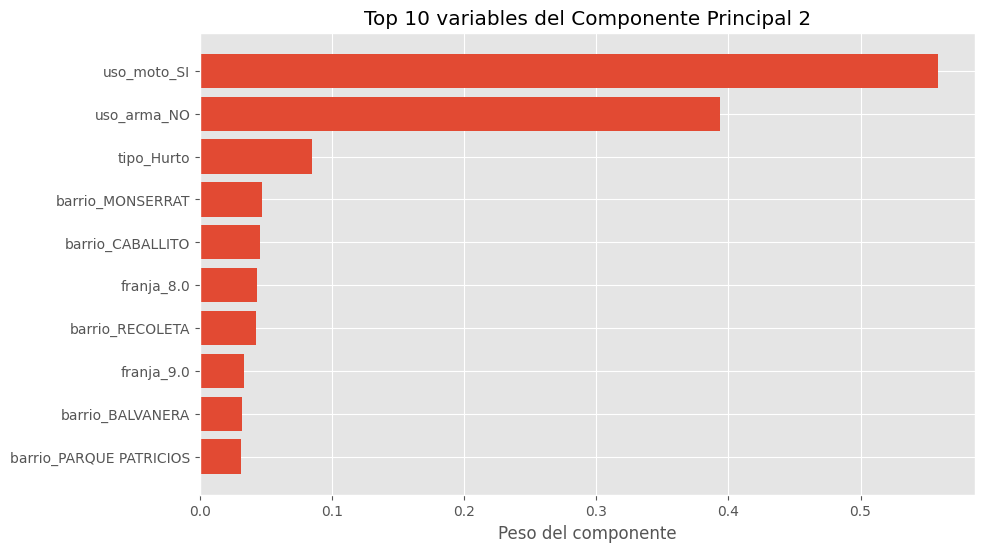

Accuracy: 0.81288155
Precision: 0.79153381
F1-Score: 0.80091085
Recall: 0.81288155
Accuracy en conjunto de entrenamiento: 0.98811468
                                precision    recall  f1-score   support

                      Amenazas       0.44      0.43      0.44      2946
                    Femicidios       0.00      0.00      0.00         2
            Homicidios dolosos       0.20      0.03      0.05        32
               Hurto automotor       0.09      0.04      0.05      1213
                   Hurto total       0.84      0.91      0.87     15081
              Lesiones Dolosas       0.49      0.48      0.49      3065
Lesiones por siniestros viales       0.45      0.38      0.41      3030
 Muertes por siniestros viales       0.25      0.14      0.18        28
                Robo automotor       0.16      0.06      0.09       205
                    Robo total       0.99      1.00      0.99     16660

                      accuracy                           0.81     42262
 

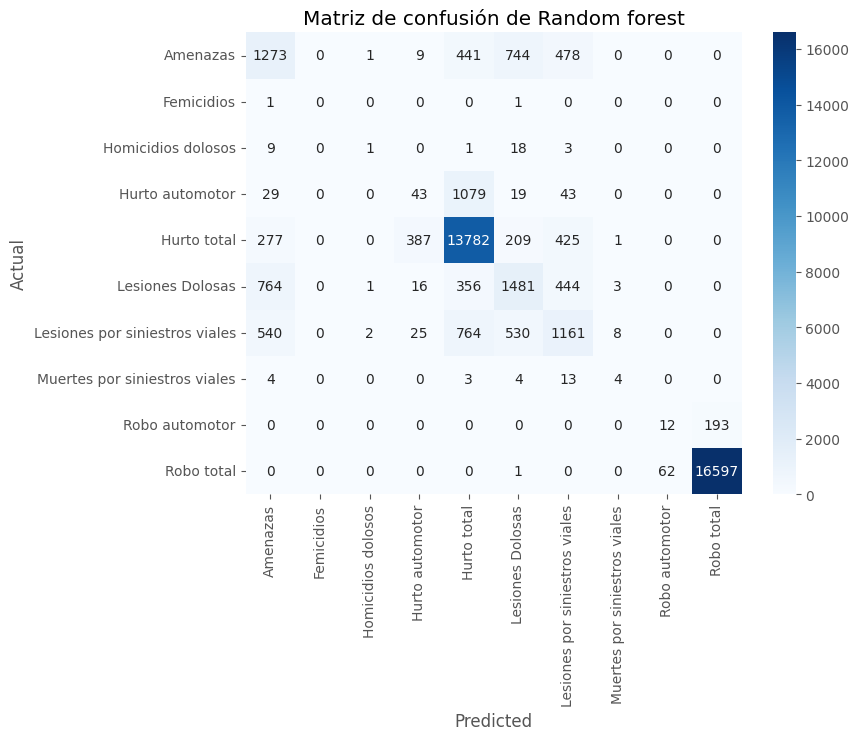

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo_pca.csv


In [ ]:
 # Selección del modelo a usar
model = rf_classifier

# Asignación del nombre del modelo para identificarlo
model_name = 'Random forest'

# Nombre del archivo donde se guardarán los resultados
filename='metricas_modelo_pca.csv'

#
df = df

# Definición de la columna target
target_column = 'subtipo'


pca_evaluation_and_save_metrics(df, target_column, model, model_name=model_name, filename=filename)

## PCA para el SVM

Cargas de las componentes principales:
         mes1  dia_DOMINGO  dia_JUEVES  dia_LUNES  dia_MARTES  dia_MIERCOLES  \
PC1 -0.029501     0.017425   -0.007037  -0.002230   -0.005808      -0.000656   
PC2  0.013414    -0.041122    0.024991  -0.002046    0.032197       0.012717   

     dia_SABADO  dia_VIERNES  franja_0.0  franja_1.0  ...  \
PC1    0.001132    -0.001393   -0.001013    0.014912  ...   
PC2   -0.019577    -0.010763   -0.020056   -0.032948  ...   

     barrio_VILLA RIACHUELO  barrio_VILLA SANTA RITA  barrio_VILLA SOLDATI  \
PC1               -0.002884                -0.012342              0.031448   
PC2               -0.013466                 0.014230             -0.067167   

     barrio_VILLA URQUIZA  tipo_Amenazas  tipo_Homicidios  tipo_Hurto  \
PC1             -0.017819      -0.065600        -0.004147   -0.314062   
PC2              0.016843      -0.039951        -0.003974    0.080904   

     tipo_Lesiones  tipo_Robo  tipo_Vialidad  
PC1      -0.063407   0.422055     

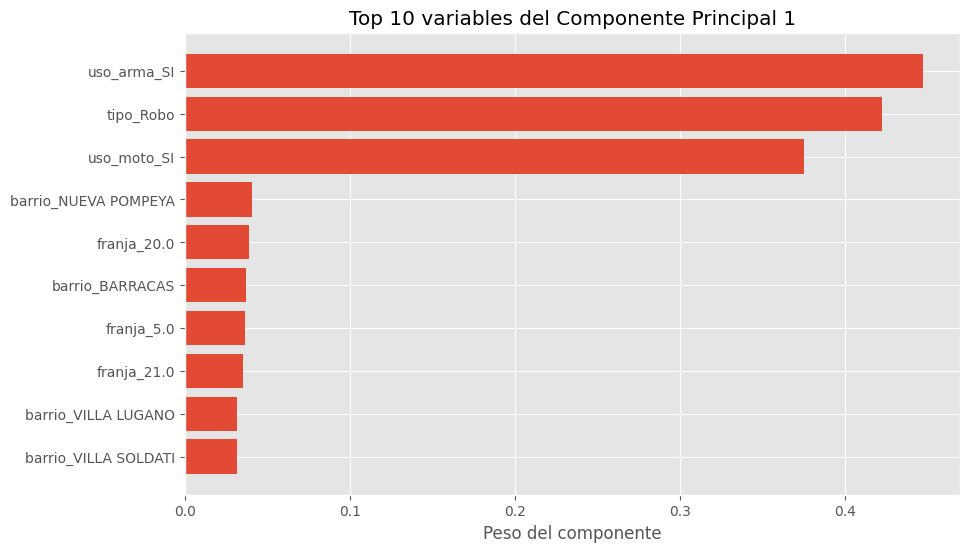

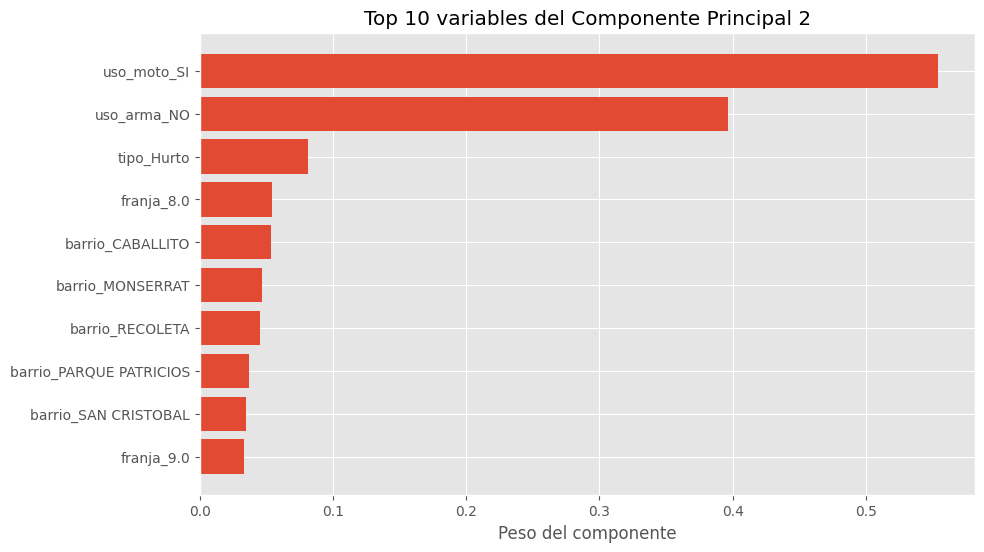

Accuracy: 0.80213904
Precision: 0.74829298
F1-Score: 0.76657163
Recall: 0.80213904
Accuracy en conjunto de entrenamiento: 0.80020079
                                precision    recall  f1-score   support

                      Amenazas       0.29      0.11      0.16      2946
                    Femicidios       0.00      0.00      0.00         2
            Homicidios dolosos       0.00      0.00      0.00        32
               Hurto automotor       0.00      0.00      0.00      1213
                   Hurto total       0.77      0.96      0.85     15081
              Lesiones Dolosas       0.45      0.52      0.48      3065
Lesiones por siniestros viales       0.45      0.28      0.34      3030
 Muertes por siniestros viales       0.00      0.00      0.00        28
                Robo automotor       0.00      0.00      0.00       205
                    Robo total       0.99      1.00      0.99     16660

                      accuracy                           0.80     42262
 

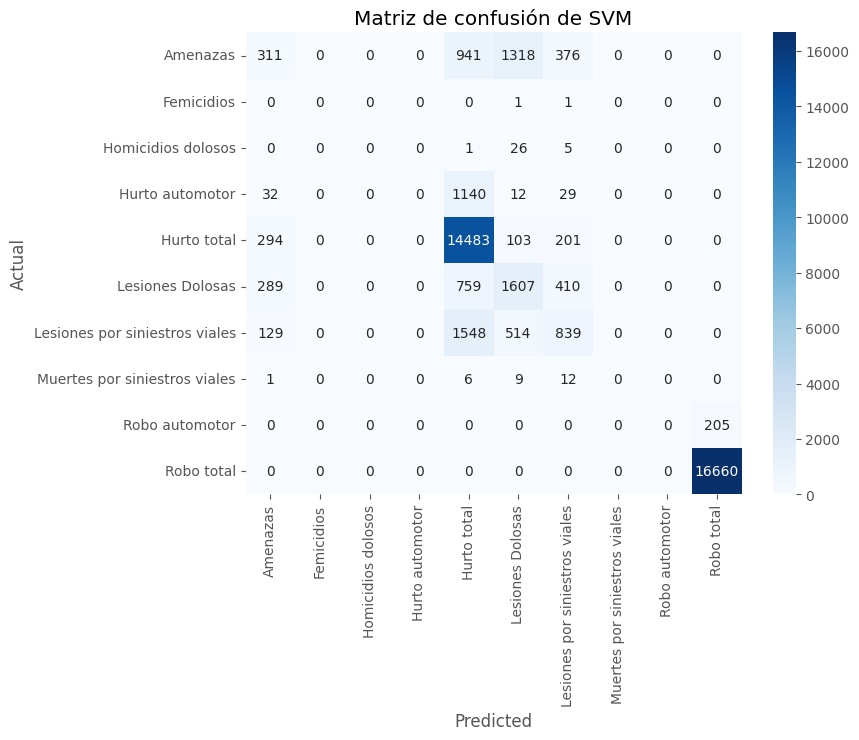

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo_pca.csv


In [ ]:
 # Selección del modelo a usar
model = svm_classifier

# Asignación del nombre del modelo para identificarlo
model_name = 'SVM'

# Nombre del archivo donde se guardarán los resultados
filename='metricas_modelo_pca.csv'

#
df = df

# Definición de la columna target
target_column = 'subtipo'


pca_evaluation_and_save_metrics(df, target_column, model, model_name=model_name, filename=filename)

## PCA para el CatBoost

Cargas de las componentes principales:
         mes1  dia_DOMINGO  dia_JUEVES  dia_LUNES  dia_MARTES  dia_MIERCOLES  \
PC1 -0.029548     0.017450   -0.007048  -0.002684   -0.004696      -0.000618   
PC2  0.016035    -0.042404    0.029578   0.006494    0.025531       0.000065   

     dia_SABADO  dia_VIERNES  franja_0.0  franja_1.0  ...  \
PC1    0.000822    -0.001796   -0.000958    0.014554  ...   
PC2   -0.022845    -0.000264   -0.009198   -0.039031  ...   

     barrio_VILLA RIACHUELO  barrio_VILLA SANTA RITA  barrio_VILLA SOLDATI  \
PC1               -0.002841                -0.012102              0.031510   
PC2               -0.018165                 0.015953             -0.066456   

     barrio_VILLA URQUIZA  tipo_Amenazas  tipo_Homicidios  tipo_Hurto  \
PC1             -0.018002      -0.065861        -0.004181   -0.313937   
PC2              0.021700      -0.030024        -0.001717    0.076557   

     tipo_Lesiones  tipo_Robo  tipo_Vialidad  
PC1      -0.064184   0.422275     

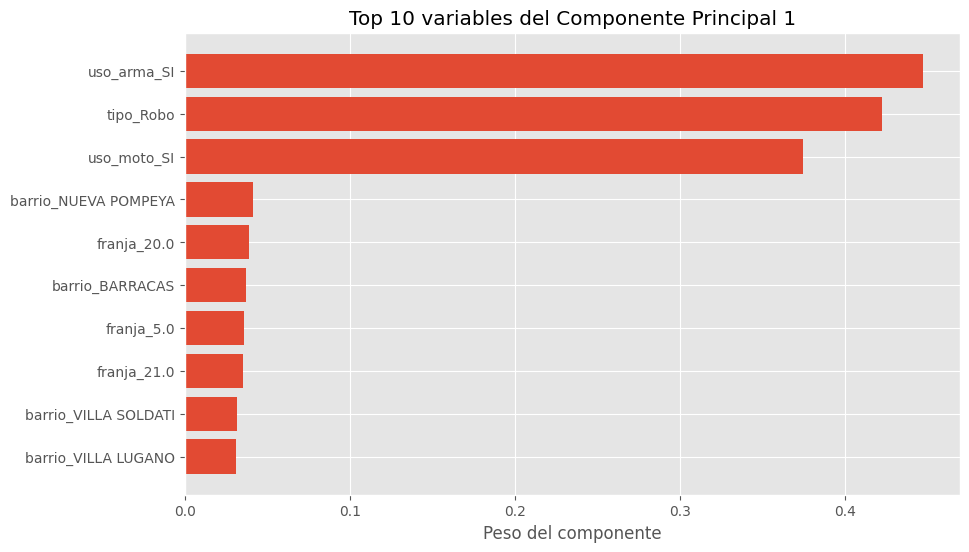

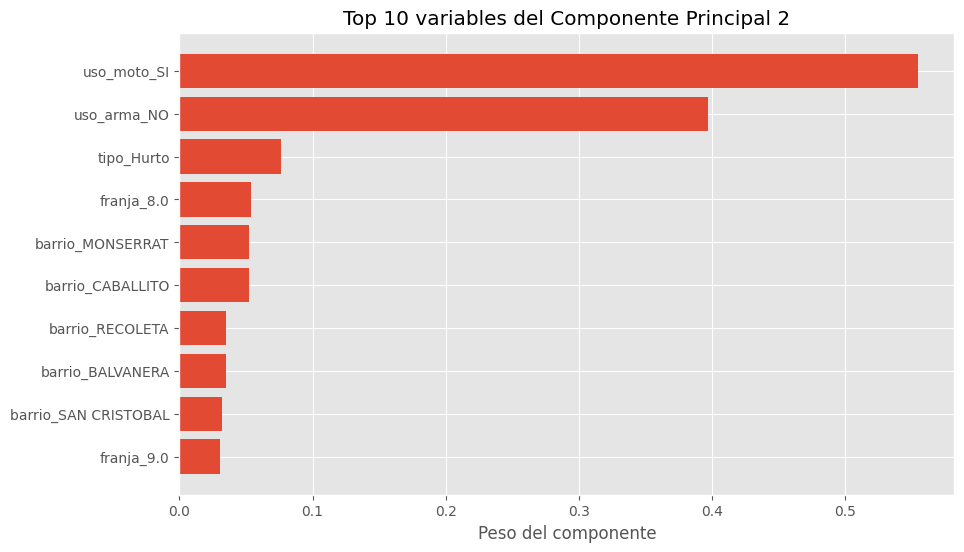

Accuracy: 0.81243197
Precision: 0.77216781
F1-Score: 0.79000139
Recall: 0.81243197
Accuracy en conjunto de entrenamiento: 0.81782596
              precision    recall  f1-score   support

           0       0.36      0.28      0.32      2946
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00      1213
           4       0.82      0.95      0.88     15081
           5       0.46      0.46      0.46      3065
           6       0.47      0.39      0.43      3030
           7       0.00      0.00      0.00        28
           8       0.00      0.00      0.00       205
           9       0.99      1.00      0.99     16660

    accuracy                           0.81     42262
   macro avg       0.31      0.31      0.31     42262
weighted avg       0.77      0.81      0.79     42262



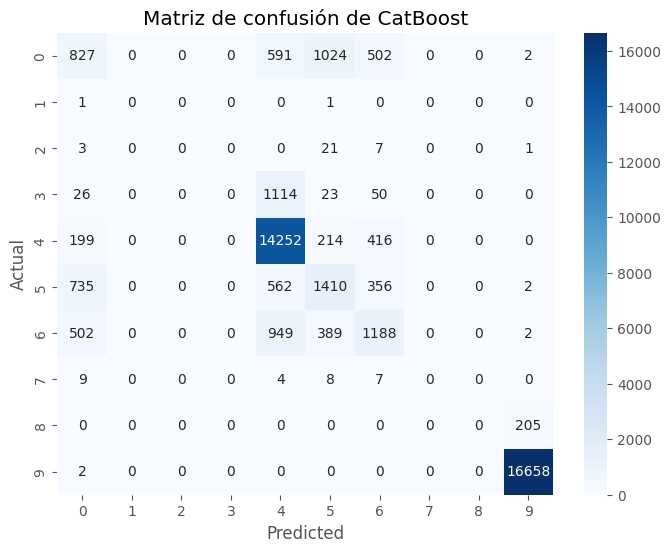

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo_pca.csv


In [ ]:
 # Selección del modelo a usar
model = catboost

# Asignación del nombre del modelo para identificarlo
model_name = 'CatBoost'

# Nombre del archivo donde se guardarán los resultados
filename='metricas_modelo_pca.csv'

#
df = df

# Definición de la columna target
target_column = 'subtipo'


pca_evaluation_and_save_metrics_catboost(df, target_column, model, model_name=model_name, filename=filename)

In [ ]:
# Esta celda imprime el archivo csv
# Nombre del archivo CSV
filename='metricas_modelo_pca.csv'
load_and_display_metrics(filename)

+-----------------------+------------+-------------+------------------+------------+----------+
| Model                 |   Accuracy |   Precision |   Accuracy train |   F1_score |   Recall |
+=======================+============+=============+==================+============+==========+
| Regresión Multinomial |   0.802802 |    0.749165 |         0.80014  |   0.76844  | 0.802802 |
+-----------------------+------------+-------------+------------------+------------+----------+
| Random forest         |   0.812882 |    0.791534 |         0.988115 |   0.800911 | 0.812882 |
+-----------------------+------------+-------------+------------------+------------+----------+
| SVM                   |   0.802139 |    0.748293 |         0.800201 |   0.766572 | 0.802139 |
+-----------------------+------------+-------------+------------------+------------+----------+
| CatBoost              |   0.812432 |    0.772168 |         0.817826 |   0.790001 | 0.812432 |
+-----------------------+------------+--

* Si se considera que todos los modelos tienen un accuracy general superior al 0.80, podría concluirse que los modelos tienen un desempeño moderadamente bueno. Sin embargo, el bajo recall indica que hubo muchos casos positivos que no fueron identificados correctamente, y la baja precisión sugiere la presencia de muchos falsos positivos.

* PCA reduce la dimensionalidad al proyectar los datos en un espacio de menor dimensión definido por componentes principales. Esto puede resultar en pérdida de información crucial para predicciones precisas en modelos de aprendizaje automático. Las primeras componentes pueden no capturar suficiente varianza de los datos originales, reduciendo la capacidad del modelo para distinguir patrones. Además, PCA puede aumentar la sensibilidad a la variabilidad residual no capturada, introduciendo ruido y afectando la estabilidad del modelo. Aunque mejora la interpretabilidad y reduce la multicolinealidad, PCA puede eliminar características relevantes para la predicción. Algunos modelos complejos pueden no funcionar bien con datos transformados por PCA, lo que subraya la importancia de evaluar cuidadosamente su efecto y considerar ajustes para mejorar los resultados del modelo


# Bayes Search

Bayes Search es una técnica avanzada para encontrar los mejores hiperparámetros de modelos de aprendizaje automático, utilizando modelos probabilísticos y la información previa de evaluaciones para guiar eficientemente la búsqueda hacia configuraciones prometedoras.

## Regresión Multinomial 70/30

Regresión Multinomial 70/30
Mejores hiperparámetros: OrderedDict([('C', 0.010046219708789278), ('max_iter', 245), ('solver', 'lbfgs')])
Accuracy: 0.96507501
Precision: 0.93422716
F1-Score: 0.94825983
Recall: 0.96507501
Accuracy en conjunto de entrenamiento: 0.96512489
                                precision    recall  f1-score   support

                      Amenazas       1.00      1.00      1.00      2943
                    Femicidios       0.00      0.00      0.00         1
            Homicidios dolosos       0.96      1.00      0.98        25
               Hurto automotor       0.00      0.00      0.00      1215
                   Hurto total       0.93      1.00      0.96     15077
              Lesiones Dolosas       1.00      1.00      1.00      3046
Lesiones por siniestros viales       0.99      1.00      0.99      3021
 Muertes por siniestros viales       0.00      0.00      0.00        33
                Robo automotor       0.33      0.00      0.01       226
          

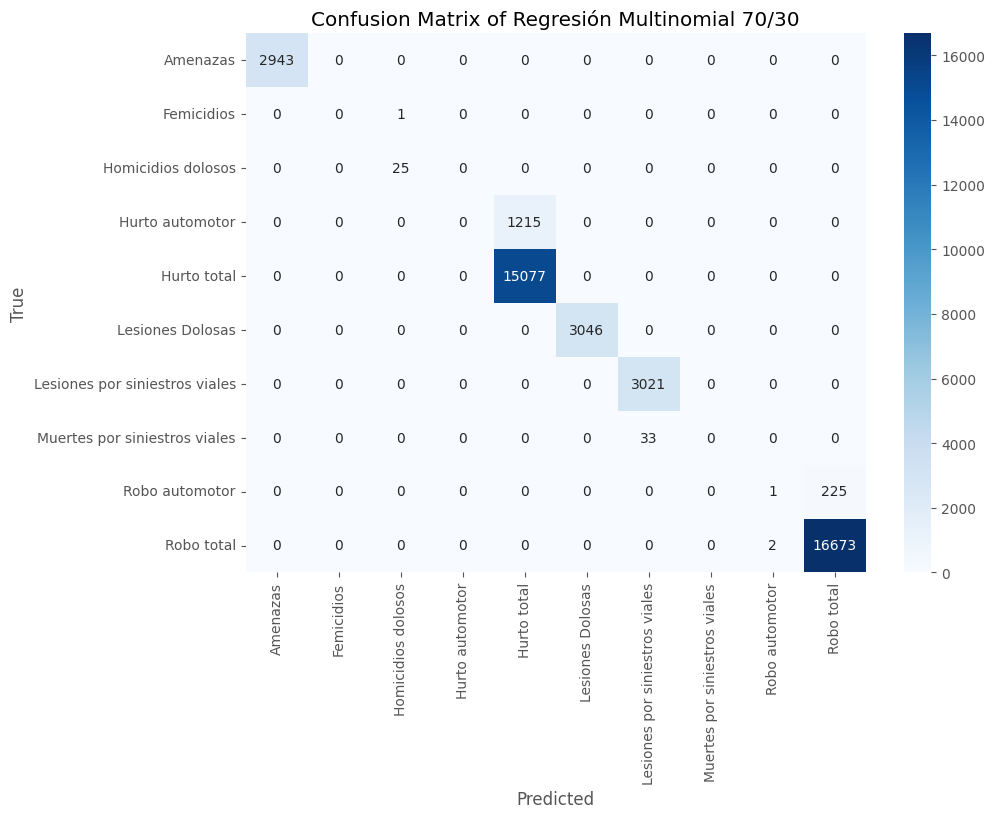

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo.csv


In [ ]:
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define el modelo a usar
model = reg_mn

# Define el nombre del modelo para identificarlo
model_name = 'Regresión Multinomial 70/30'

# Nombre del archivo donde se guardarán los resultados
filename = 'metricas_modelo.csv'

# Espacios de búsqueda para los hiperparámetros
param_space = {
    'C': Real(1e-4, 1e4, prior='log-uniform'),
    'solver': Categorical(['lbfgs', 'newton-cg', 'sag', 'saga']),
    'max_iter': Integer(50, 500)
}

# Llamar a la función con los datos y el modelo
bayes_search_and_save_metrics(X_train_scaled_g1, y_train_g1, X_test_scaled_g1, y_test_g1, model, param_space, model_name=model_name, filename=filename)

## Regresión Multinomial 80/20

Regresión Multinomial 80/20
Mejores hiperparámetros: OrderedDict([('C', 0.010046219708789278), ('max_iter', 245), ('solver', 'lbfgs')])
Accuracy: 0.96500444
Precision: 0.93237620
F1-Score: 0.94815512
Recall: 0.96500444
Accuracy en conjunto de entrenamiento: 0.96513630
                                precision    recall  f1-score   support

                      Amenazas       1.00      1.00      1.00      1962
                    Femicidios       0.00      0.00      0.00         1
            Homicidios dolosos       0.94      1.00      0.97        17
               Hurto automotor       0.00      0.00      0.00       810
                   Hurto total       0.93      1.00      0.96     10051
              Lesiones Dolosas       1.00      1.00      1.00      2031
Lesiones por siniestros viales       0.99      1.00      0.99      2014
 Muertes por siniestros viales       0.00      0.00      0.00        22
                Robo automotor       0.00      0.00      0.00       151
          

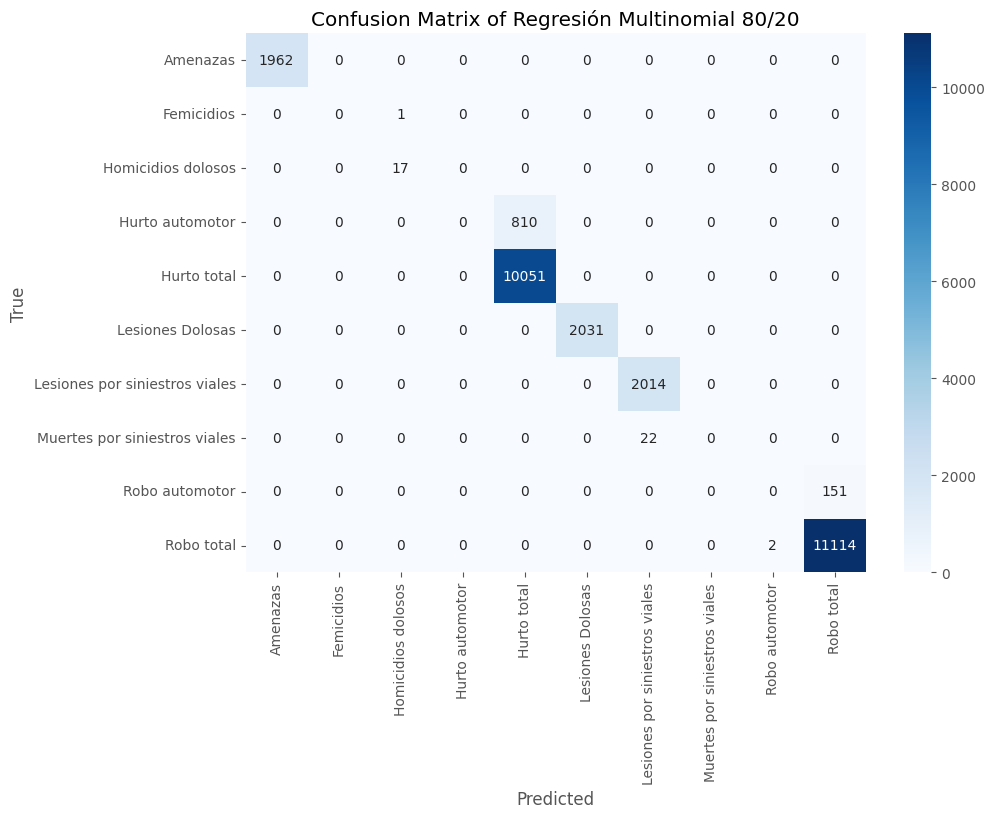

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo.csv


In [ ]:
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define el modelo a usar
model = reg_mn

# Define el nombre del modelo para identificarlo
model_name = 'Regresión Multinomial 80/20'

# Nombre del archivo donde se guardarán los resultados
filename = 'metricas_modelo.csv'

# Espacios de búsqueda para los hiperparámetros
param_space = {
    'C': Real(1e-4, 1e4, prior='log-uniform'),
    'solver': Categorical(['lbfgs', 'newton-cg', 'sag', 'saga']),
    'max_iter': Integer(50, 500)
}

# Llamar a la función con los datos y el modelo
bayes_search_and_save_metrics(X_train_scaled_g2, y_train_g2, X_test_scaled_g2, y_test_g2, model, param_space, model_name=model_name, filename=filename)

## Random Forest 70/30

Random Forest 70/30
Mejores hiperparámetros: OrderedDict([('max_depth', 22), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 4), ('n_estimators', 197)])
Accuracy: 0.96507501
Precision: 0.93242190
F1-Score: 0.94821329
Recall: 0.96507501
Accuracy en conjunto de entrenamiento: 0.96533785
                                precision    recall  f1-score   support

                      Amenazas       1.00      1.00      1.00      2943
                    Femicidios       0.00      0.00      0.00         1
            Homicidios dolosos       0.96      1.00      0.98        25
               Hurto automotor       0.00      0.00      0.00      1215
                   Hurto total       0.93      1.00      0.96     15077
              Lesiones Dolosas       1.00      1.00      1.00      3046
Lesiones por siniestros viales       0.99      1.00      0.99      3021
 Muertes por siniestros viales       0.00      0.00      0.00        33
                Robo automotor       0.0

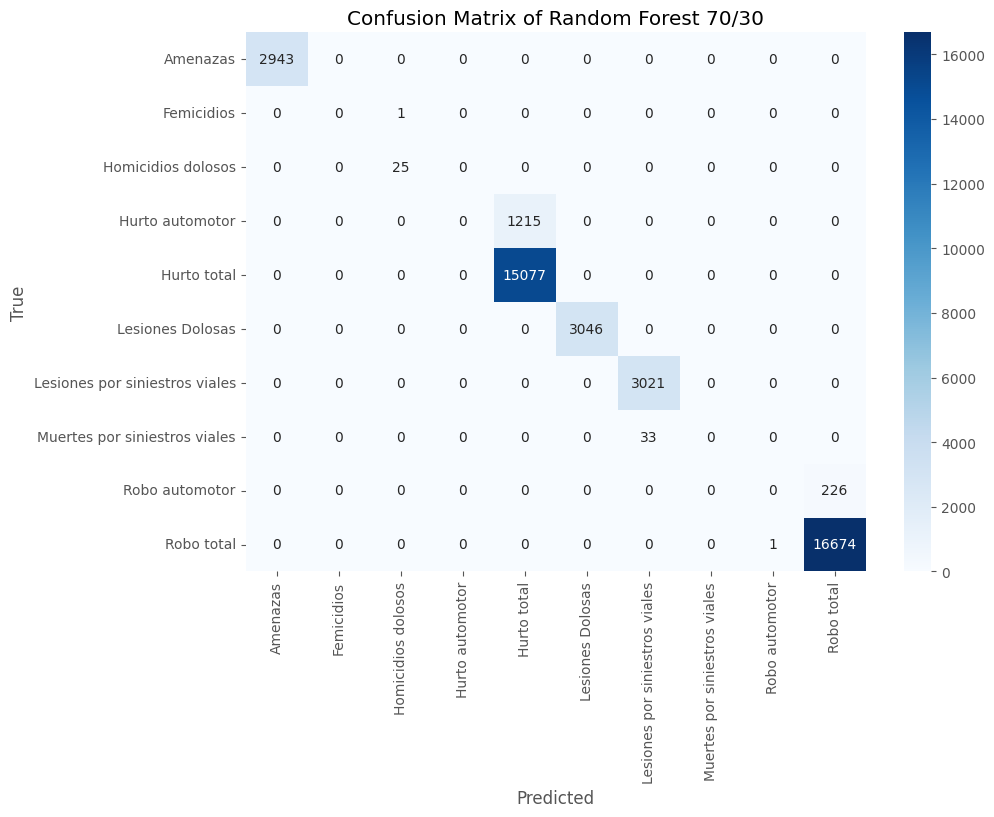

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo.csv


In [ ]:
!pip install scikit-optimize

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define el modelo a usar
model = rf_classifier

# Define el nombre del modelo para identificarlo
model_name = 'Random Forest 70/30'

# Nombre del archivo donde se guardarán los resultados
filename = 'metricas_modelo.csv'

# Espacios de búsqueda para los hiperparámetros
param_space = {
    'n_estimators': Integer(10, 200),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Categorical(['auto', 'sqrt', 'log2'])
}

# Llamar a la función con los datos y el modelo
bayes_search_and_save_metrics(X_train_scaled_g1, y_train_g1, X_test_scaled_g1, y_test_g1, model, param_space, model_name=model_name, filename=filename)

## Random Forest 80/20

Random Forest 80/20
Mejores hiperparámetros: OrderedDict([('max_depth', 42), ('max_features', 'log2'), ('min_samples_leaf', 7), ('min_samples_split', 19), ('n_estimators', 174)])
Accuracy: 0.96507542
Precision: 0.93237713
F1-Score: 0.94819061
Recall: 0.96507542
Accuracy en conjunto de entrenamiento: 0.96509193
                                precision    recall  f1-score   support

                      Amenazas       1.00      1.00      1.00      1962
                    Femicidios       0.00      0.00      0.00         1
            Homicidios dolosos       0.94      1.00      0.97        17
               Hurto automotor       0.00      0.00      0.00       810
                   Hurto total       0.93      1.00      0.96     10051
              Lesiones Dolosas       1.00      1.00      1.00      2031
Lesiones por siniestros viales       0.99      1.00      0.99      2014
 Muertes por siniestros viales       0.00      0.00      0.00        22
                Robo automotor       0.

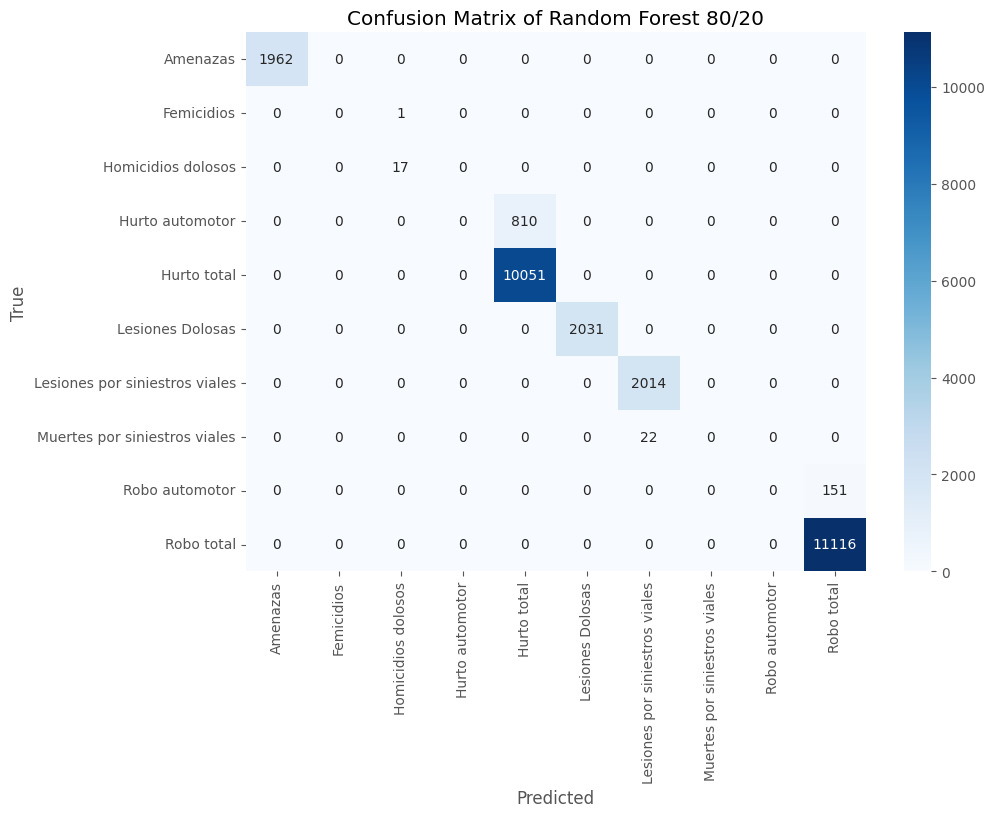

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo.csv


In [ ]:
!pip install scikit-optimize

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define el modelo a usar
model = rf_classifier

# Define el nombre del modelo para identificarlo
model_name = 'Random Forest 80/20'

# Nombre del archivo donde se guardarán los resultados
filename = 'metricas_modelo.csv'

# Espacios de búsqueda para los hiperparámetros
param_space = {
    'n_estimators': Integer(10, 200),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Categorical(['auto', 'sqrt', 'log2'])
}

# Llamar a la función con los datos y el modelo
bayes_search_and_save_metrics(X_train_scaled_g2, y_train_g2, X_test_scaled_g2, y_test_g2, model, param_space, model_name=model_name, filename=filename)

## CatBoost 70/30

CatBoost 70/30
Mejores hiperparámetros: OrderedDict([('border_count', 123), ('depth', 8), ('iterations', 940), ('l2_leaf_reg', 4), ('learning_rate', 0.021892527128216443)])
Accuracy: 0.96509867
Precision: 0.93511873
F1-Score: 0.94827187
Recall: 0.96509867
Accuracy en conjunto de entrenamiento: 0.96516545
                                precision    recall  f1-score   support

                      Amenazas       1.00      1.00      1.00      2943
                    Femicidios       0.00      0.00      0.00         1
            Homicidios dolosos       0.96      1.00      0.98        25
               Hurto automotor       0.00      0.00      0.00      1215
                   Hurto total       0.93      1.00      0.96     15077
              Lesiones Dolosas       1.00      1.00      1.00      3046
Lesiones por siniestros viales       0.99      1.00      0.99      3021
 Muertes por siniestros viales       0.00      0.00      0.00        33
                Robo automotor       0.50    

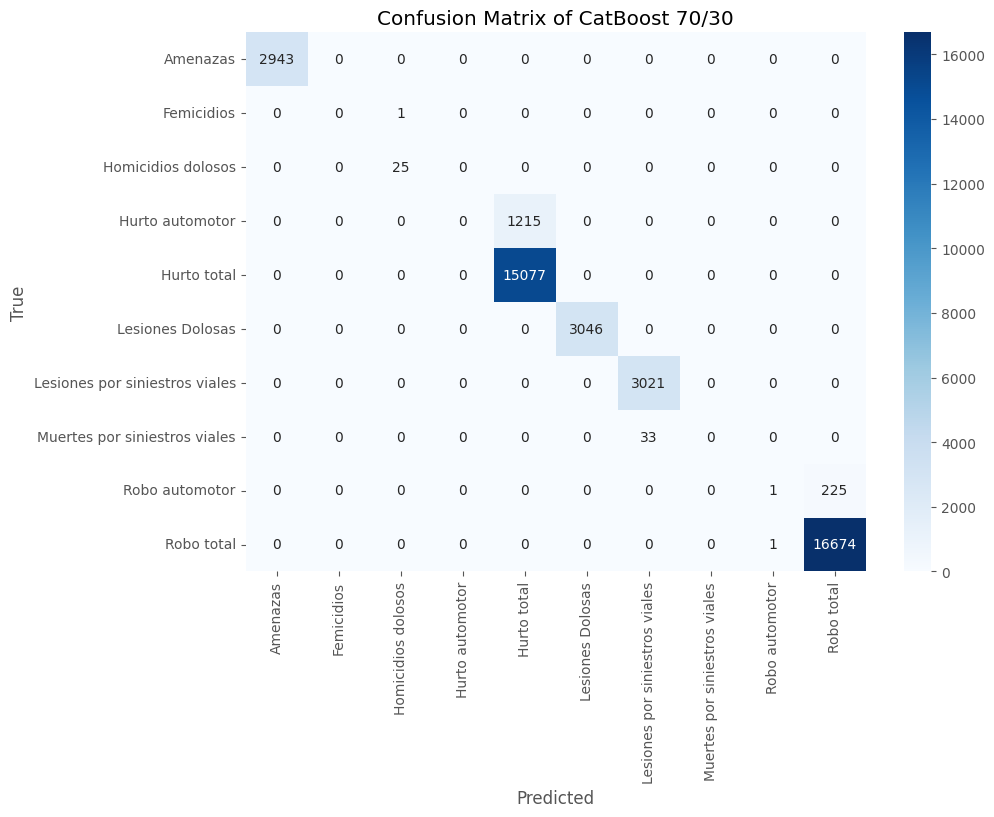

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo.csv


In [ ]:
!pip install scikit-optimize

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define el modelo a usar
model = catboost

# Define el nombre del modelo para identificarlo
model_name = 'CatBoost 70/30'

# Nombre del archivo donde se guardarán los resultados
filename = 'metricas_modelo.csv'

# Espacios de búsqueda para los hiperparámetros
param_space = {
    'iterations': Integer(100, 1000),
    'depth': Integer(4, 10),
    'learning_rate': Real(1e-3, 1e-1, prior='log-uniform'),
    'l2_leaf_reg': Integer(1, 10),
    'border_count': Integer(32, 255)
}
# Llamar a la función con los datos y el modelo
bayes_search_and_save_metrics(X_train_scaled_g1, y_train_g1, X_test_scaled_g1, y_test_g1, model, param_space, model_name=model_name, filename=filename)

## CatBoost 80/20

CatBoost 80/20
Mejores hiperparámetros: OrderedDict([('border_count', 36), ('depth', 4), ('iterations', 598), ('l2_leaf_reg', 1), ('learning_rate', 0.08239924360873595)])
Accuracy: 0.96500444
Precision: 0.93237620
F1-Score: 0.94815512
Recall: 0.96500444
Accuracy en conjunto de entrenamiento: 0.96519841
                                precision    recall  f1-score   support

                      Amenazas       1.00      1.00      1.00      1962
                    Femicidios       0.00      0.00      0.00         1
            Homicidios dolosos       0.94      1.00      0.97        17
               Hurto automotor       0.00      0.00      0.00       810
                   Hurto total       0.93      1.00      0.96     10051
              Lesiones Dolosas       1.00      1.00      1.00      2031
Lesiones por siniestros viales       0.99      1.00      0.99      2014
 Muertes por siniestros viales       0.00      0.00      0.00        22
                Robo automotor       0.00      

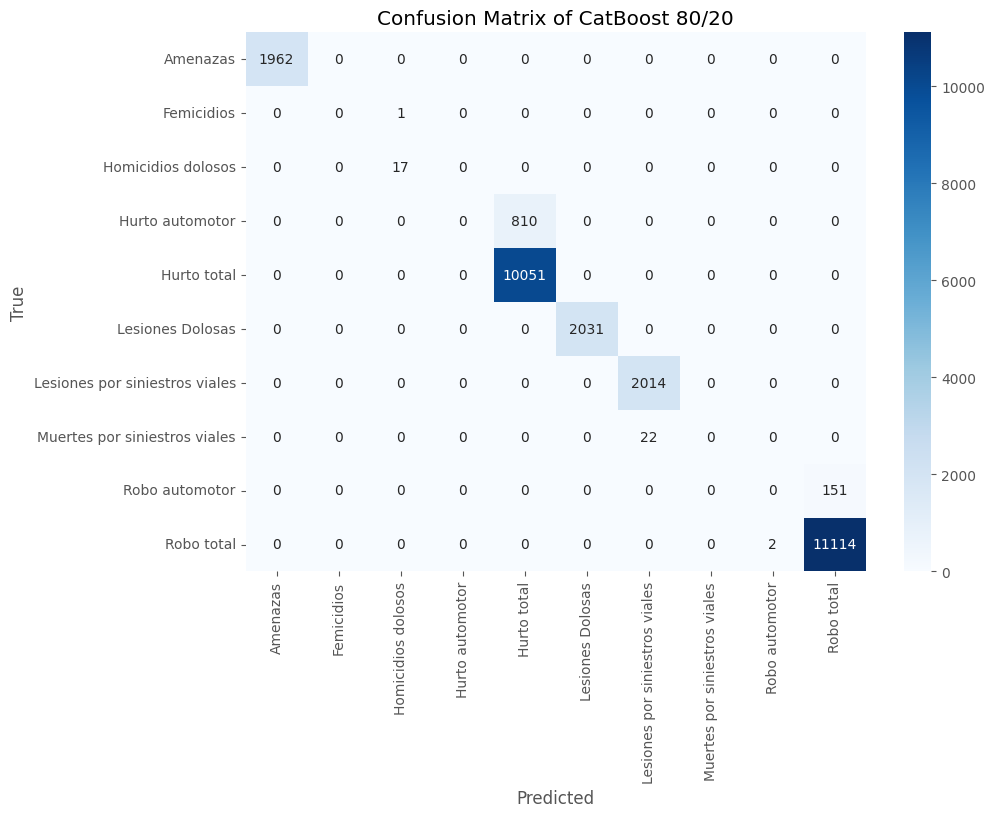

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo.csv


In [ ]:
!pip install scikit-optimize

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define el modelo a usar
model = catboost

# Define el nombre del modelo para identificarlo
model_name = 'CatBoost 80/20'

# Nombre del archivo donde se guardarán los resultados
filename = 'metricas_modelo.csv'

# Espacios de búsqueda para los hiperparámetros
param_space = {
    'iterations': Integer(100, 1000),
    'depth': Integer(4, 10),
    'learning_rate': Real(1e-3, 1e-1, prior='log-uniform'),
    'l2_leaf_reg': Integer(1, 10),
    'border_count': Integer(32, 255)
}

# Llamar a la función con los datos y el modelo
bayes_search_and_save_metrics(X_train_scaled_g2, y_train_g2, X_test_scaled_g2, y_test_g2, model, param_space, model_name=model_name, filename=filename)

## SVM 70/30

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.0001, 'linear', 1000] before, using random point [32.55801298680276, 'sigmoid', 677]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM 80/20
Mejores hiperparámetros: OrderedDict([('C', 0.03730933404253923), ('kernel', 'linear'), ('max_iter', 1000)])
Accuracy: 0.69876012
Precision: 0.93281067
F1-Score: 0.72112081
Recall: 0.69876012
Accuracy en conjunto de entrenamiento: 0.69802959
                                precision    recall  f1-score   support

                      Amenazas       1.00      1.00      1.00      2943
                    Femicidios       0.00      0.00      0.00         1
            Homicidios dolosos       0.96      1.00      0.98        25
               Hurto automotor       0.07      0.80      0.13      1215
                   Hurto total       0.92      0.19      0.31     15077
              Lesiones Dolosas       1.00      1.00      1.00      3046
Lesiones por siniestros viales       0.99      1.00      0.99      3021
 Muertes por siniestros viales       0.00      0.00      0.00        33
                Robo automotor       0.00      0.00      0.00       226
                    Robo to

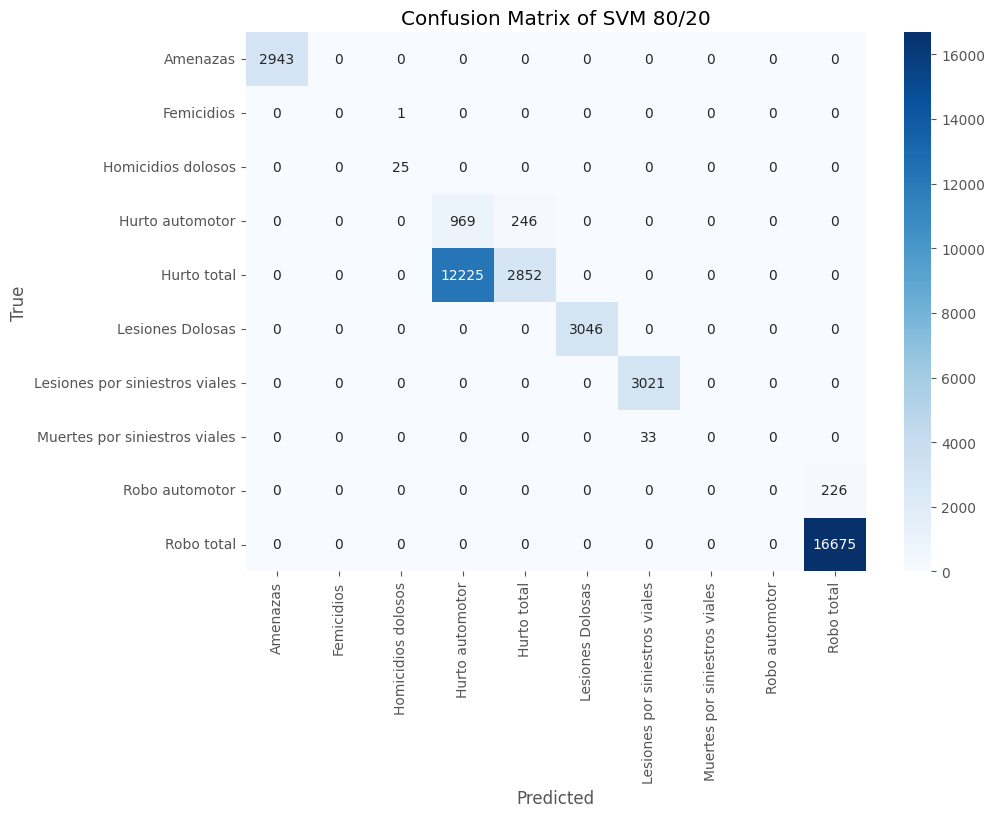

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo.csv


In [ ]:
# Define el modelo a usar
model = svm_classifier

# Define el nombre del modelo para identificarlo
model_name = 'SVM 70/30'

# Nombre del archivo donde se guardarán los resultados
filename = 'metricas_modelo.csv'

# Espacios de búsqueda para los hiperparámetros
param_space = {
    'C': Real(1e-4, 1e4, prior='log-uniform'),
    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    'max_iter': Integer(100, 1000)
}

# Llamar a la función con los datos y el modelo
bayes_search_and_save_metrics(X_train_scaled_g1, y_train_g1, X_test_scaled_g1, y_test_g1, model, param_space, model_name=model_name, filename=filename)

## SVM 80/20

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=934).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM 80/20
Mejores hiperparámetros: OrderedDict([('C', 0.016744908355724498), ('kernel', 'linear'), ('max_iter', 934)])
Accuracy: 0.94530612
Precision: 0.93519327
F1-Score: 0.94019544
Recall: 0.94530612
Accuracy en conjunto de entrenamiento: 0.94490488
                                precision    recall  f1-score   support

                      Amenazas       1.00      1.00      1.00      1962
                    Femicidios       0.00      0.00      0.00         1
            Homicidios dolosos       0.94      1.00      0.97        17
               Hurto automotor       0.09      0.07      0.08       810
                   Hurto total       0.93      0.94      0.93     10051
              Lesiones Dolosas       1.00      1.00      1.00      2031
Lesiones por siniestros viales       0.99      1.00      0.99      2014
 Muertes por siniestros viales       0.00      0.00      0.00        22
                Robo automotor       0.00      0.00      0.00       151
                    Robo to

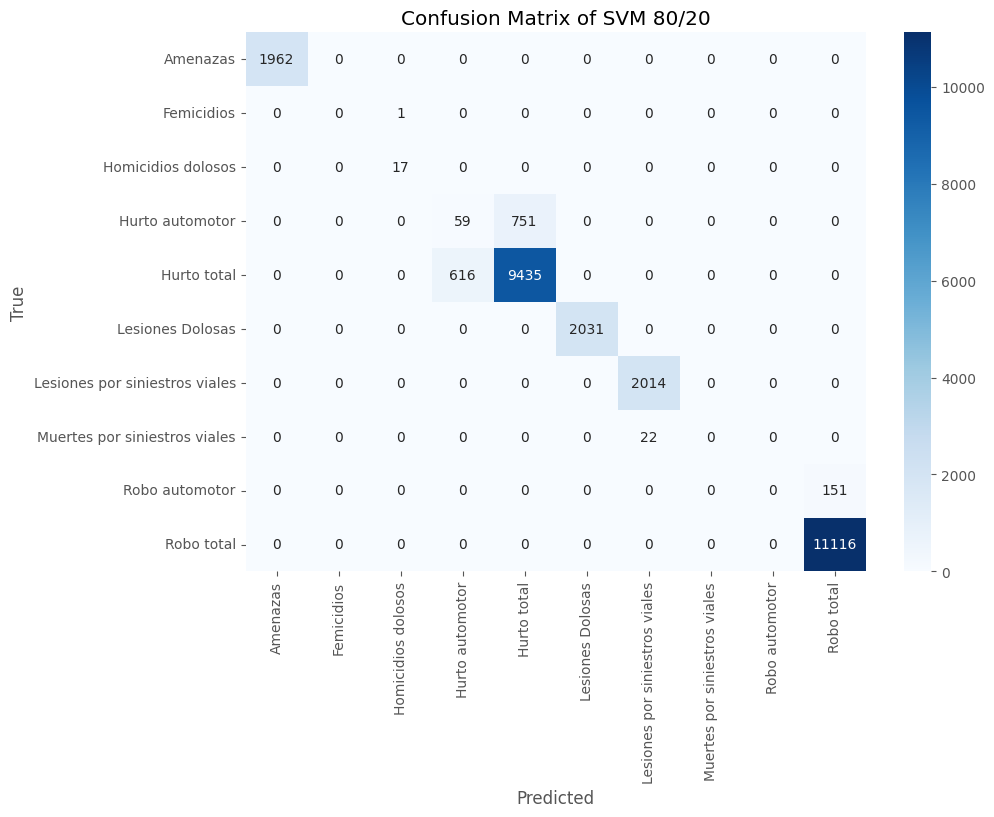

Métricas guardadas en /content/drive/MyDrive/Coder Ds/Proyecto Final/metricas_modelo.csv


In [ ]:
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define el modelo a usar
model = svm_classifier

# Define el nombre del modelo para identificarlo
model_name = 'SVM 80/20'

# Nombre del archivo donde se guardarán los resultados
filename = 'metricas_modelo.csv'

# Espacios de búsqueda para los hiperparámetros
param_space = {
    'C': Real(1e-4, 1e4, prior='log-uniform'),
    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    'max_iter': Integer(100, 1000)
}

# Llamar a la función con los datos y el modelo
bayes_search_and_save_metrics(X_train_scaled_g2, y_train_g2, X_test_scaled_g2, y_test_g2, model, param_space, model_name=model_name, filename=filename)

In [ ]:
# Esta celda imprime el archivo csv
# Nombre del archivo CSV
filename='metricas_modelo.csv'
load_and_display_metrics(filename)

+-----------------------------+------------+-------------+------------------+------------+----------+
| Model                       |   Accuracy |   Precision |   Accuracy train |   F1_score |   Recall |
+=============================+============+=============+==================+============+==========+
| Random Forest 70/30         |   0.965075 |    0.932422 |         0.965338 |   0.948213 | 0.965075 |
+-----------------------------+------------+-------------+------------------+------------+----------+
| Random Forest 80/20         |   0.965075 |    0.932377 |         0.965092 |   0.948191 | 0.965075 |
+-----------------------------+------------+-------------+------------------+------------+----------+
| Regresión Multinomial 70/30 |   0.965075 |    0.934227 |         0.965125 |   0.94826  | 0.965075 |
+-----------------------------+------------+-------------+------------------+------------+----------+
| CatBoost 70/30              |   0.965099 |    0.935119 |         0.965165 |   0.

La búsqueda bayesiana incrementó el desempeño de los modelos CatBoost y Random Forest, mantuvo el mismo desempeño en el modelo de Regresión Multinomial y tuvo un peor desempeño en el modelo SVM. En el SVM con partición 70/30, se evidenció una notable reducción en las métricas de desempeño porque alcanzó el número máximo de iteraciones en el espacio de búsqueda. Ajustando ese parámetro, es muy probable que se mejore el desempeño.







# Elección del modelo

* Antes que nada, los comentarios sobre el desempeño de los modelos se hicieron considerando el valor general de accuracy, aunque esta no es la métrica principal utilizada para elegir el mejor modelo.

* No fue tomado en cuenta, pero el tiempo de ejecución de los modelos de tipo SVM fueron hasta 500 % más altos que los demás.

In [ ]:
# Esta celda imprime el archivo csv
# Nombre del archivo CSV
filename='resultados.csv'
load_and_display_metrics(filename)

+------------------------------------+------------+-------------+------------------+------------+----------+
| Model                              |   Accuracy |   Precision |   Accuracy train |   F1_score |   Recall |
+====================================+============+=============+==================+============+==========+
| CatBoost 80/20 smote               |   0.96433  |    0.946864 |         0.985454 |   0.948523 | 0.96433  |
+------------------------------------+------------+-------------+------------------+------------+----------+
| CatBoost 70/30 smote               |   0.964129 |    0.936959 |         0.986012 |   0.948331 | 0.964129 |
+------------------------------------+------------+-------------+------------------+------------+----------+
| Regresión Multinomial 70/30 simple |   0.965075 |    0.934227 |         0.965176 |   0.94826  | 0.965075 |
+------------------------------------+------------+-------------+------------------+------------+----------+


 * En principio, se abordó un problema de clasificación para recomendación, donde se tomó en cuenta el F1-score como métrica principal para tomar la decisión. El objetivo era que las predicciones fueran tanto positivas como relevantes, ya que esta medida equilibra el recall con la precisión.

 * El modelo CatBoost con sobremuestreo SMOTE y una división de datos de 80/20 parece ser la mejor opción debido a su alto rendimiento general en las métricas clave de evaluación, especialmente teniendo en cuenta el equilibrio entre Precision y Recall, que son críticos para un problema de clasificación precisa y relevante.

# Conclusiones

* Comparando los modelos entre sí, utilizando los dos grupos de datos, solo se evidencia una diferencia en el desempeño del modelo SVM después de la búsqueda bayesiana por las razones mencionadas anteriormente.

* La gran cantidad de datos hace que el desempeño en la predicción de las clases mayoritarias sea muy preciso en la mayoría de los casos. No obstante, el desbalance sesga el entrenamiento de los modelos y complica la correcta predicción de las clases minoritarias. Habría que probar más métodos para contrarrestar el desbalance y tratar de encontrar desempeños superiores.

* Generalmente, con la proporción 80/20 se pierde un poco de precisión en las clases mayoritarias y se gana un poco en las clases minoritarias.

* La búsqueda bayesiana generó espacio para mejorar algunos de los modelos evaluados, cuyos parámetros estaban muy cerca de los bordes.
